# Gender and Age Group Analysis of Mortality Patterns in Alberta

##### Team Members: Osama Bilgrami​​, Graeme Ko​​, Umair Qureshi​​, Soyebal Saad Adnan​​, Ray Alsaidi

## Table of Contents:
1. Introduction
2. Project Goal and Motivation
3. Dataset
4. Data Exploration and Cleaning
5. Data Visualizations and Analysis
6. Conclusion
7. References



## 1. Introduction
Death is an indisputable fact of life, an unavoidable reality that is frequently veiled in silence. It
is one of society's deepest taboos, owing to the enormous sentiments of terror and despair that it
evokes. However, concealed behind this conundrum is a wealth of knowledge waiting to be
explored. Extensive data has been methodically collected and analyzed over the years to unravel
the complexities of its nature, causes, and chronology. Although we cannot avoid its inevitable
embrace, we can embrace a deeper understanding and identify areas where improvements can be
made.
For our project, we will perform a gender and age group analysis of mortality patterns in Alberta.
We have data spanning over a period of twenty years which will aid us in studying various death
causes across all age groups and genders. There are many insights that can be extracted from this
data, such as leading causes of death in a particular age group or ratio of deaths by accident in
any given year. There are many layers to unfold, and we are determined to bring forth some
essential insights.

## 2. Project Goal and Motivation

The project aims to identify the leading causes of death using data spanning from 2001 to 2022, establishing a fundamental understanding of the mortality landscape. Once the top causes are identified, the analysis will delve into potential gender disparities. Are specific causes of death more prevalent among males, while others are more common among females? Recognizing these gender differences can provide guidance for healthcare and prevention strategies.

The extended examination over this substantial time frame can reveal trends in the leading causes of death. Look for consistent patterns, significant changes, or fluctuations across the years. Additionally, breaking down the mortality data into various age groups can help pinpoint causes of death that vary among different age cohorts. Are there certain causes that disproportionately affect specific age groups, such as young adults, middle-aged individuals, or seniors? Are there indications of certain causes becoming more prevalent over time, suggesting emerging health concerns? On the other hand, are there causes that are on the decline? Understanding these trends can offer valuable insights for targeted interventions.

By comprehensively addressing these questions, you can provide valuable insights into how these trends impact public health, healthcare systems, and the overall well-being of the population in Alberta. The implications of these findings for public health planning, healthcare resource allocation, and policy development are immense.


**Data Source**: https://open.alberta.ca/dataset/deaths-cause-by-gender-and-age/resource/0e420902-e5e7-4fc4-af2a-5fd826c17d33
## 3. Dataset
| Column title| Data Type   |Description|
| :----------- | :----------- | :--------|
| `Calendar Year`       | Categorical      |The year that the death occurred|
| `Cause`         |Categorical| Causes of death (538 Unique cases)|
| `Gender` |Categorical|Represents the gender of the person|
| `0-4,5-9,...90+`       |Numerical|Count of death within each age group|
| `NS`    | Numeric|Number of casualties with unknown age group|
| `Res Total`       | Numeric|Number of casualties who are a resident of Alberta|
| `Non Res Total `       | Numeric|Number of casualties who are not a resident of Alberta|
| `Grand Total`     | Numeric|Total number of Casualties|


### 4. Data Exploration and Cleaning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import datetime as dt
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go

rawdata = pd.read_csv('deaths-by-gender-and-age00.csv', skiprows=1)

We first take a peek at our dataset.

In [2]:
rawdata.head()

Calendar Year              Cause Gender  0-4  5-9  10-14  15-19  20-24  \
0           2001        1   Cholera      M    0    0      0      0      0   
1           2001        1   Cholera      F    0    0      0      0      0   
2           2001        1   Cholera      T    0    0      0      0      0   
3           2001  2   Typhoid fever      M    0    0      0      0      0   
4           2001  2   Typhoid fever      F    0    0      0      0      0   

   25-29  30-34  ...  65-69  70-74  75-79  80-84  85-89  90+  NS  Res Total  \
0      0      0  ...      0      0      0      0      0    0   0          0   
1      0      0  ...      0      0      0      0      0    0   0          0   
2      0      0  ...      0      0      0      0      0    0   0          0   
3      0      0  ...      0      0      0      0      0    0   0          0   
4      0      0  ...      0      0      0      0      0    0   0          0   

  Non  Res Total Grand Total  
0              0           0  
1              0           0  
2              0           0  
3              0           0  
4              0           0  

[5 rows x 26 columns]

In [3]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25174 entries, 0 to 25173
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Calendar Year   25174 non-null  int64 
 1   Cause           25174 non-null  object
 2   Gender          25174 non-null  object
 3   0-4             25174 non-null  int64 
 4   5-9             25174 non-null  int64 
 5   10-14           25174 non-null  int64 
 6   15-19           25174 non-null  int64 
 7   20-24           25174 non-null  int64 
 8   25-29           25174 non-null  int64 
 9   30-34           25174 non-null  int64 
 10  35-39           25174 non-null  int64 
 11  40-44           25174 non-null  int64 
 12  45-49           25174 non-null  int64 
 13  50-54           25174 non-null  int64 
 14  55-59           25174 non-null  int64 
 15  60-64           25174 non-null  int64 
 16  65-69           25174 non-null  int64 
 17  70-74           25174 non-null  int64 
 18  75-79 

We have two data types: int64 and object. Three of our age group columns need to be type-casted along with the 'Calendar Year' column. We discovered that there are string characters like '###' which cannot be converted to integer. Therefore, we took the necessary cleaning steps to replace these entries with 0 once they were converted to NaN values, before being converted to integer values.

In [4]:
rawdata.describe()

Calendar Year           0-4           5-9         10-14         15-19  \
count   25174.000000  25174.000000  25174.000000  25174.000000  25174.000000   
mean     2011.865059      1.031302      0.087908      0.109359      0.420672   
std         6.353366     11.109405      0.971375      1.207241      4.719179   
min      2001.000000      0.000000      0.000000      0.000000      0.000000   
25%      2006.000000      0.000000      0.000000      0.000000      0.000000   
50%      2012.000000      0.000000      0.000000      0.000000      0.000000   
75%      2017.000000      0.000000      0.000000      0.000000      0.000000   
max      2022.000000    356.000000     36.000000     47.000000    151.000000   

              20-24         25-29         30-34         35-39         40-44  \
count  25174.000000  25174.000000  25174.000000  25174.000000  25174.000000   
mean       0.689163      0.817192      0.948201      1.153134      1.492373   
std        7.829005      9.922856     11.638230     13.686116     16.483012   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      270.000000    425.000000    551.000000    679.000000    665.000000   

              45-49         50-54         55-59         60-64         65-69  \
count  25174.000000  25174.000000  25174.000000  25174.000000  25174.000000   
mean       2.149718      3.033288      4.095893      5.125765      6.095654   
std       22.995697     32.325472     44.176998     56.081249     66.501095   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max      767.000000   1038.000000   1628.000000   2300.000000   2774.000000   

              70-74            NS     Res Total  Non  Res Total   Grand Total  
count  25174.000000  25174.000000  25174.000000    25174.000000  25174.000000  
mean       7.427663      0.002979     78.946572        1.480694     80.425201  
std       79.994744      0.102945    838.592649       16.064372    854.331339  
min        0.000000      0.000000      0.000000        0.000000      0.000000  
25%        0.000000      0.000000      0.000000        0.000000      0.000000  
50%        0.000000      0.000000      4.000000        0.000000      4.000000  
75%        2.000000      0.000000     23.000000        0.000000     24.000000  
max     3321.000000      9.000000  32215.000000      608.000000  32823.000000

In [5]:
# there are '###' values making the columns being read as object dtype
rawdata['75-79'] = pd.to_numeric(rawdata['75-79'], errors='coerce')
rawdata['80-84'] = pd.to_numeric(rawdata['80-84'], errors='coerce')
rawdata['85-89'] = pd.to_numeric(rawdata['85-89'], errors='coerce')
rawdata['90+'] = pd.to_numeric(rawdata['90+'], errors='coerce')

columns_to_convert = ['75-79', '80-84', '85-89', '90+']

# looping through the columns to handle non-finite values
for column in columns_to_convert:
    rawdata[column].fillna(0, inplace=True)
    rawdata[column] = rawdata[column].astype(int)

# calendar year to datetime
rawdata['Calendar Year'] = pd.to_datetime(rawdata['Calendar Year'], format='%Y')

rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25174 entries, 0 to 25173
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Calendar Year   25174 non-null  datetime64[ns]
 1   Cause           25174 non-null  object        
 2   Gender          25174 non-null  object        
 3   0-4             25174 non-null  int64         
 4   5-9             25174 non-null  int64         
 5   10-14           25174 non-null  int64         
 6   15-19           25174 non-null  int64         
 7   20-24           25174 non-null  int64         
 8   25-29           25174 non-null  int64         
 9   30-34           25174 non-null  int64         
 10  35-39           25174 non-null  int64         
 11  40-44           25174 non-null  int64         
 12  45-49           25174 non-null  int64         
 13  50-54           25174 non-null  int64         
 14  55-59           25174 non-null  int64         
 15  60

We find that we do not have any missing values in our dataset.

In [6]:
# checking null values
rawdata.isnull().sum()

Calendar Year     0
Cause             0
Gender            0
0-4               0
5-9               0
10-14             0
15-19             0
20-24             0
25-29             0
30-34             0
35-39             0
40-44             0
45-49             0
50-54             0
55-59             0
60-64             0
65-69             0
70-74             0
75-79             0
80-84             0
85-89             0
90+               0
NS                0
Res Total         0
Non  Res Total    0
Grand Total       0
dtype: int64

There were a few duplicate entries, so we decided to remove them.

In [7]:
# checking duplicates
dup_rows = rawdata[rawdata.duplicated(keep=False)]
print(dup_rows)

      Calendar Year                                             Cause Gender  \
1140     2002-01-01                                 25   Lyme disease      M   
1141     2002-01-01                                 25   Lyme disease      F   
1142     2002-01-01                                 25   Lyme disease      T   
1143     2002-01-01                                 26   Typhus fever      M   
1144     2002-01-01                                 26   Typhus fever      F   
...             ...                                               ...    ...   
19203    2017-01-01  354  Other legal intervention and their sequelae      U   
19761    2018-01-01       112 Diseases of the ear and mastoid process      M   
19764    2018-01-01       112 Diseases of the ear and mastoid process      M   
19766    2018-01-01                         113 Acute rheumatic fever      U   
19770    2018-01-01                         113 Acute rheumatic fever      U   

       0-4  5-9  10-14  15-19  20-24  2

In [8]:
rawdata1 = rawdata.drop_duplicates()

In the following code chunk, we will be doing a basic cleaning of the dataset with a focus on the cause of deaths column. The function "cause_clean()" takes a single cause entry represented by a string, and aims to remove the serial number attached to it by splitting the string by a common delimiter. While some years share serial numbers for causes, we cannot use this data as other years have opposing serial numbers for the same causes. Similarly, some of the older years had the label "Group Description" instead of "Total", so this function changes the name of the older years to match the newer. Some categories such as "Other" do not contain serial numbers, in which case these were to be excluded in serial number removal. This function also helps to remove double space errors and some hyphen errors, as some of the years had the same cause listed with but spacing errors.

The function "basic_pdclean()" used "cause_clean()" as a helper function mapped to every cause entry within the dataset. It's also used to strip all extra whitespace within the dataframe.

In [9]:
def cause_clean(cause):
    # will use this as a helper function for basic_pdclean
    # gets rid of serial numbers and does some basic renaming of old data category name
    if cause == "Group Description":
        cause = "Total"
    if cause == "Not Specified":
        cause = "NS"
    if cause == "NS ":
        cause = "NS"
    if cause not in ["Other","Total", "NS"]:
        cause = " ".join(cause.split(' ')[1:])
        cause = "".join(cause.split("- "))
        cause = " ".join(cause.split("  "))
    return cause

def basic_pdclean(df):
    # clean Cause column
    df["Cause"] = df["Cause"].map(lambda x: cause_clean(x))

    # remove all whitespace
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    print(f"There are {len(df['Cause'].unique()) - 3} unique causes total in our data")
    return df

cdata = basic_pdclean(rawdata)

There are 473 unique causes total in our data


To keep up with best practices, we will rename the columns to snake-case.

In [10]:
# fixing column names
cdata = cdata.rename(columns={"Calendar Year":"year", "Cause":'cause_death', 'Gender':'gender', 'Res Total':'total_res', 'Non  Res Total':'total_nonres', 'Grand Total':'total' })
cdata.head(5)

year    cause_death gender  0-4  5-9  10-14  15-19  20-24  25-29  \
0 2001-01-01        Cholera      M    0    0      0      0      0      0   
1 2001-01-01        Cholera      F    0    0      0      0      0      0   
2 2001-01-01        Cholera      T    0    0      0      0      0      0   
3 2001-01-01  Typhoid fever      M    0    0      0      0      0      0   
4 2001-01-01  Typhoid fever      F    0    0      0      0      0      0   

   30-34  ...  65-69  70-74  75-79  80-84  85-89  90+  NS  total_res  \
0      0  ...      0      0      0      0      0    0   0          0   
1      0  ...      0      0      0      0      0    0   0          0   
2      0  ...      0      0      0      0      0    0   0          0   
3      0  ...      0      0      0      0      0    0   0          0   
4      0  ...      0      0      0      0      0    0   0          0   

   total_nonres  total  
0             0      0  
1             0      0  
2             0      0  
3             0      0  
4             0      0  

[5 rows x 26 columns]

There is an entry called 'Total' which is aggregating all the causes.

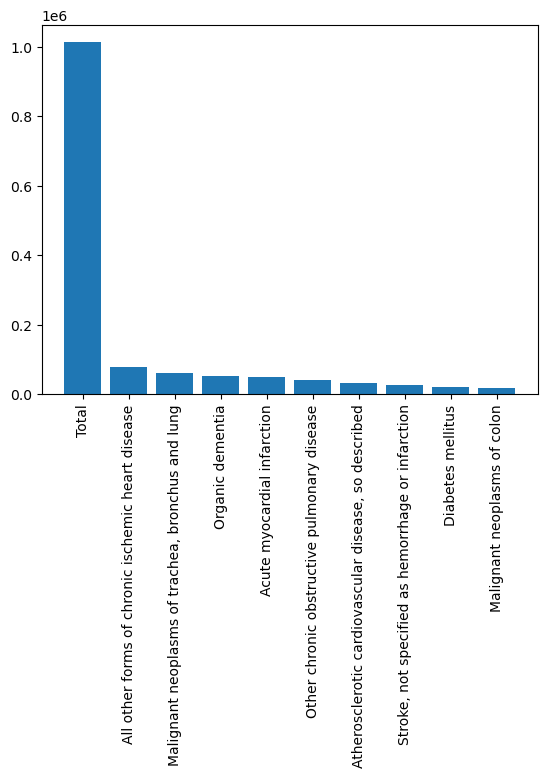

In [11]:
group_cause = cdata.groupby('cause_death')['total'].sum().nlargest(10).reset_index()
plt.bar(group_cause['cause_death'],group_cause['total'])
plt.xticks(rotation=90)
plt.show()

We decided to eliminate the 'Total' and 'NS' entries within the Causes column, along with the 'T' totals found in the Gender column. These specific entries introduce the potential for double-counting, which could adversely impact our analytical efforts. By removing these entries, we gain the ability to focus on individual causes and subsequently aggregate the counts independently, leading to a more robust and accurate analysis.

In [12]:
cdata = cdata[cdata['cause_death'] != 'Total']
cdata = cdata[cdata['cause_death'] != 'NS']

The 'NS' column only has 18 entries. We will be removing them since they won't contribute much to our analysis.

In [13]:
cdata['NS'].value_counts()

0    25029
1       18
Name: NS, dtype: int64

In [14]:
cdata = cdata.drop(['NS'], axis=1)
cdata.head()

year    cause_death gender  0-4  5-9  10-14  15-19  20-24  25-29  \
0 2001-01-01        Cholera      M    0    0      0      0      0      0   
1 2001-01-01        Cholera      F    0    0      0      0      0      0   
2 2001-01-01        Cholera      T    0    0      0      0      0      0   
3 2001-01-01  Typhoid fever      M    0    0      0      0      0      0   
4 2001-01-01  Typhoid fever      F    0    0      0      0      0      0   

   30-34  ...  60-64  65-69  70-74  75-79  80-84  85-89  90+  total_res  \
0      0  ...      0      0      0      0      0      0    0          0   
1      0  ...      0      0      0      0      0      0    0          0   
2      0  ...      0      0      0      0      0      0    0          0   
3      0  ...      0      0      0      0      0      0    0          0   
4      0  ...      0      0      0      0      0      0    0          0   

   total_nonres  total  
0             0      0  
1             0      0  
2             0      0  
3             0      0  
4             0      0  

[5 rows x 25 columns]

There are some unidentified entries in the gender column. To keep our analysis simple and not make assumptions about the gender entries, we decided to proceed with our analysis by dropping these unidentified entries since we do not have access to a data dictionary for this dataset.

In [15]:
cdata['gender'].value_counts()

T       7516
M       7480
F       7472
U       2571
NS         7
s  M       1
Name: gender, dtype: int64

In [16]:
cdata = cdata[cdata['gender'] != 'U']
cdata = cdata[cdata['gender'] != 'T']
cdata = cdata[cdata['gender'] != 'NS']
cdata = cdata[cdata['gender'] != 's  M']
cdata['gender'].value_counts()

M    7480
F    7472
Name: gender, dtype: int64

The dataset is now cleaned and ready for analysis.

In [17]:
cdata.head()

year                                        cause_death gender  0-4  \
0 2001-01-01                                            Cholera      M    0   
1 2001-01-01                                            Cholera      F    0   
3 2001-01-01                                      Typhoid fever      M    0   
4 2001-01-01                                      Typhoid fever      F    0   
6 2001-01-01  Paratyphoid fevers and other salmonella infect...      M    0   

   5-9  10-14  15-19  20-24  25-29  30-34  ...  60-64  65-69  70-74  75-79  \
0    0      0      0      0      0      0  ...      0      0      0      0   
1    0      0      0      0      0      0  ...      0      0      0      0   
3    0      0      0      0      0      0  ...      0      0      0      0   
4    0      0      0      0      0      0  ...      0      0      0      0   
6    0      0      0      0      0      0  ...      0      0      0      0   

   80-84  85-89  90+  total_res  total_nonres  total  
0      0      0    0          0             0      0  
1      0      0    0          0             0      0  
3      0      0    0          0             0      0  
4      0      0    0          0             0      0  
6      0      0    0          0             0      0  

[5 rows x 25 columns]

We now have a clean dataframe comprising of 25 columns and 23,747 rows. To facilitate the creation of data visualizations, we decided to modify this dataframe. We transformed it from a wide data format to a long data format using the pandas 'pd.melt' method. However, we encountered a need to exclude the 'total_res,' 'total_nonres,' and 'total' columns due to potential double-counting issues. This step was taken to improve the clarity of our visualizations, with the aim of representing each age group in our dataset more effectively. Consequently, we chose to remove these columns, retaining only the 'count' column for an accurate count of all Alberta residents in different age groups.

In [18]:
# melting the df to include all age columns in 'age_group'
df_melted = pd.melt(cdata, id_vars=['year', 'cause_death', 'gender','total_res','total_nonres','total'], var_name='age_group', value_name='count')
df_m = df_melted.drop(['total_res','total_nonres','total'], axis=1)
df_m

year                                        cause_death gender  \
0      2001-01-01                                            Cholera      M   
1      2001-01-01                                            Cholera      F   
2      2001-01-01                                      Typhoid fever      M   
3      2001-01-01                                      Typhoid fever      F   
4      2001-01-01  Paratyphoid fevers and other salmonella infect...      M   
...           ...                                                ...    ...   
284083 2022-01-01  Volume depletion, disorders of fluid, electrol...      F   
284084 2022-01-01                          Water transport accidents      M   
284085 2022-01-01                          Water transport accidents      F   
284086 2022-01-01                             Zoster (herpes zoster)      M   
284087 2022-01-01                             Zoster (herpes zoster)      F   

       age_group  count  
0            0-4      0  
1            0-4      0  
2            0-4      0  
3            0-4      0  
4            0-4      0  
...          ...    ...  
284083       90+     10  
284084       90+      0  
284085       90+      0  
284086       90+      1  
284087       90+      0  

[284088 rows x 5 columns]

**SunBurst Diagram Data Wrangling:**

The current data presents a challenge: if we filter the top causes for each year, the list may contain a mix of male and female cases, with males potentially dominating the list. Additionally, some years have significantly higher death counts. To address these issues, we followed these steps to prepare the data for a sunburst diagram:
1.	Utilized the primary clean dataset (df_m) and grouped it by year, gender, causes of death, and count.
2.	Segregated the data frame into two separate frames, one for males and another for females.
3.	Constructed a dictionary with years as the keys.
4.	Employed a for loop to divide the data into the dictionary, with each year having its corresponding data.
5.	Selected the top 10 causes of death for each year.
6.	Merged each gender's dictionary into a data frame using another for loop, eventually concatenating both the male and female data frames into the final format ready for use in the sunburst diagram.



In [19]:
#data wrangling - Sunburst Diagram (Ray)
df_agg = df_m.groupby(['gender', 'year', 'cause_death'])['count'].sum().reset_index()
df_agg=df_agg[df_agg['count']!=0]
df_agg['year'] = pd.to_datetime(df_agg['year'], errors='coerce').dt.year

#create a range of years to be used in the dictionary.
ye=list(range(2001,2023,1))

#create two dataframes filtered by genders.
df_agg_male=df_agg[(df_agg['gender']=="M")]
df_agg_female=df_agg[(df_agg['gender']=="F")]

#create dictionary to store different dataframes for each year.
df={name: pd.DataFrame() for name in ye}
df_top10 = {name: pd.DataFrame() for name in ye}

# for loop to store split the data for each year into the dictionary, pick the largest 10 causes, then combine them.
for key, value in df.items():
    df[key]=df_agg_female[df_agg['year']==(key)]
for key, value in df_top10 .items():
    df_top10[key]=df[key].nlargest(10,'count')
frame_female=[]
for key, value in df_top10 .items():
    frame_female.append(df_top10[key])

#clear the dictionaries to be used again to extract and sort top 10 causes of death for males.
df.clear
df_top10.clear
df={name: pd.DataFrame() for name in ye}
df_top10 = {name: pd.DataFrame() for name in ye}

for key, value in df.items():
    df[key]=df_agg_male[df_agg['year']==(key)]
for key, value in df_top10.items():
    df_top10[key]=df[key].nlargest(10,'count')
frame_male=[]
for key, value in df_top10 .items():
    frame_male.append(df_top10[key])
#combine both frames
both_genders_frame=frame_female+frame_male

#change lists to pandas frame
final = pd.concat(both_genders_frame)

C:\Users\USER\AppData\Local\Temp\ipykernel_27128\3462986586.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[key]=df_agg_female[df_agg['year']==(key)]
C:\Users\USER\AppData\Local\Temp\ipykernel_27128\3462986586.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[key]=df_agg_male[df_agg['year']==(key)]


In [20]:
age_grp= df_m.groupby('age_group')['count'].sum()
age_grp

age_group
0-4       6349
10-14      682
15-19     2593
20-24     4244
25-29     4962
30-34     5803
35-39     7084
40-44     9230
45-49    13372
5-9        544
50-54    18850
55-59    25531
60-64    32031
65-69    38153
70-74    46530
75-79    56346
80-84    67624
85-89    71564
90+      83014
Name: count, dtype: int64

In [21]:
# define order for the age groups
age_group_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+']

# convert the age_group column to a categorical data type with the specified order
df_m['age_group'] = pd.Categorical(df_m['age_group'], categories=age_group_order, ordered=True)
age_grp= df_m.groupby('age_group')['count'].sum()
age_grp

age_group
0-4       6349
5-9        544
10-14      682
15-19     2593
20-24     4244
25-29     4962
30-34     5803
35-39     7084
40-44     9230
45-49    13372
50-54    18850
55-59    25531
60-64    32031
65-69    38153
70-74    46530
75-79    56346
80-84    67624
85-89    71564
90+      83014
Name: count, dtype: int64

The list "cancers" contains keywords of which our causes of death would belong to. The function 'create_cancerdf' iterates through this list and returns three outputs, one of them being a new dataframe containing only causes related cancer and the other outputs being lists of cancer and non-cancer causes respectively. There are currently 81 identified causes of cancer based on these 15 keywords from our dataset.  

In [22]:
cancers = ["angioimmunoblastic","myelodysplastic","carcinoma","sarcoma","neoplasm","neoplasms","lymphoma","hodgkin's","leukemia","plasmacytoma","mesothelioma","melanoma","phoma","plasms","leukaemia"]

def create_cancerdf(df):
    cancerdf = df.copy()
    canc = []
    noncanc = []
    causes = cancerdf["cause_death"].unique()
    cancerdf = cancerdf.set_index("cause_death")
    for cause in causes:
        for commaword in cause.split(','):
            for word in commaword.split(' '):
                w = word.lower()
                if w in cancers:
                    canc.append(cause)
                    break
        if cause not in canc:
            noncanc.append(cause)
            cancerdf = cancerdf.drop([cause],axis=0)
    cancerdf = cancerdf.reset_index()
    return cancerdf, canc, noncanc

### 5. Data Visualization and Analysis

#### Death trends over the last 20 years

In [23]:
df_m.head()
Total_pop_ab = [3058108,3128429,3183065,3238668,3321768,3421434,3514147,3595856,3678996,3732082,3789030,3874548,3981011,4083648,4144491,4196061,4241100,4298275,4362576,4416682,4443773,4695290]
death_prop = df_m.groupby('year')['count'].sum().reset_index()
death_prop = death_prop.rename(columns={'count': 'Sum of deaths'})
death_prop['Total Population'] = Total_pop_ab
death_prop['year'] = death_prop['year'].dt.year
death_prop['percentage'] = round((death_prop['Sum of deaths']/death_prop['Total Population'])*100,2)

fig1 = px.bar(death_prop,x='Sum of deaths',y='year',color='year',text='percentage',orientation='h',
    title='Proportion of deaths from 2001 to 2021',
    labels={'year': 'Year', 'Sum of deaths': 'Death Count'},
)
fig2 = px.bar(death_prop,x='Total Population',y='year',color='year',orientation='h',
    title='Total Population from 2001 to 2021',
    labels={'year': 'Year', 'Total Population': 'Death Count'},
)


fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Bar(fig1.data[0]), row=1, col=1)
fig.add_trace(go.Bar(fig2.data[0]), row=1, col=2)
fig.update_layout(title_text="Proportion of deaths and Total Population from 2001 to 2022", title_x = 0.5, showlegend=False)
fig.update_xaxes(title_text='Total Population',row=1, col=2)
fig.update_xaxes(title_text='Sum of Death',row=1, col=1)
fig.update_yaxes(title_text='Year')

fig.show()

The data shows that from 2001 to 2020, the death rate in Alberta remained relatively stable at around 0.55% of the total population. This indicates that for each year during this period, the number of deaths accounted for approximately 0.55% of the total population. The death rate increased significantly in 2020, rising to approximately 0.66%. The COVID-19 pandemic is a serious potential among the many causes of this abrupt increase. The pandemic may have increased the number of deaths brought on by the virus as well as indirect effects like a strain on the healthcare system. Following the increase in 2020, the death rate remained relatively constant at around 0.7% in 2021 and 2022. This suggests that whatever contributed to the increase in 2020 had a lasting impact on the death rate in Alberta.
In conclusion, the data show that Alberta's death rate remained largely steady in relation to the population up until 2020, when it began to noticeably rise. A continuous, higher death rate was observed between 2020 and 2022, which may have been caused by outside influences like the COVID-19 pandemic. It would be necessary to do additional investigation and analysis to determine the precise reasons for these variations in the fatality rate.


#### Gender Analysis

In [24]:
gender_prop = df_m.groupby(['year','gender'])['count'].sum().unstack(fill_value=0).reset_index()
gender_prop['Total'] = gender_prop['F'] + gender_prop['M']
gender_prop['Percentage_Female'] = round((gender_prop['F'] / gender_prop['Total']) * 100,2)
gender_prop['Percentage_Male'] = round((gender_prop['M'] / gender_prop['Total']) * 100,2)
fig1 = px.line(gender_prop, x="year", y="M", markers = True,
               text=gender_prop['Percentage_Male'].apply(lambda x: f'{x:.2f}%'))
fig1.update_traces(line=dict(color='red'), name='Male')

fig2 = px.line(gender_prop, x="year", y="F", markers = True,
               text=gender_prop['Percentage_Female'].apply(lambda x: f'{x:.2f}%'))
fig2.update_traces(line=dict(color='blue'), name='Female')
combined_fig = go.Figure()
for trace in fig1.data:
    combined_fig.add_trace(trace)

for trace in fig2.data:
    combined_fig.add_trace(trace)

combined_fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='red'), name='Male'))
combined_fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='blue'), name='Female'))
combined_fig.update_layout(title_text="Male Vs Female Proportions over the Year", title_x = 0.5, showlegend=False)
combined_fig.update_xaxes(title_text='Year')
combined_fig.update_yaxes(title_text='Sum of Death')
combined_fig.update_layout(showlegend=True)
combined_fig.show()

The number of male deaths in comparison to the female deaths is always higher by at least 3% for every year. This consistent difference implies that, on average, a higher proportion of males were dying each year compared to females. The largest gender gap was between 2020 and 2022, when there was a rise of nearly 11% in the ratio of male deaths to female deaths.


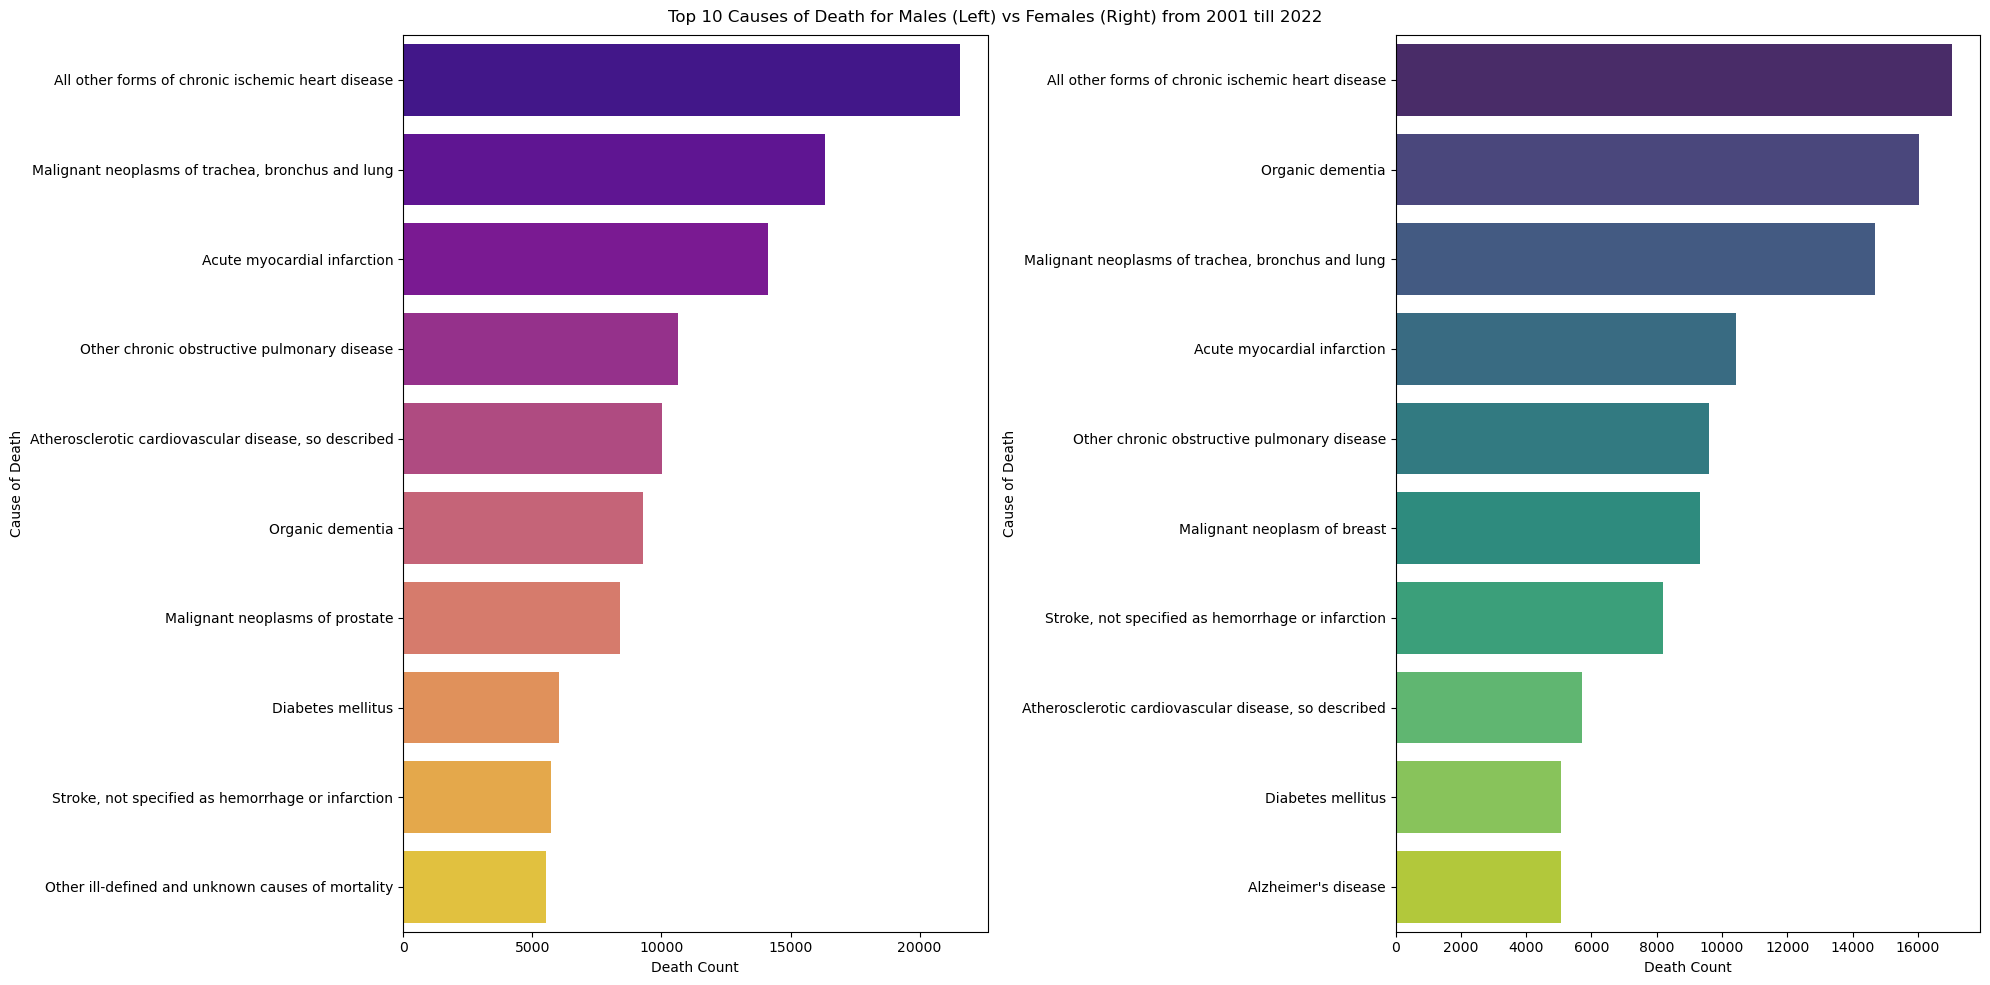

In [25]:
# grouping by gender separately for all years
male = df_m[df_m['gender'] == 'M']
female = df_m[df_m['gender'] == 'F']
df_male = male.groupby('cause_death')['count'].sum().reset_index()
df_female = female.groupby('cause_death')['count'].sum().reset_index()

# filtering for M and F and getting the top 10 causes
top10_male = df_male.nlargest(10, 'count')
top10_fem = df_female.nlargest(10, 'count')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Top 10 Causes of Death for Males (Left) vs Females (Right) from 2001 till 2022')
sns.barplot(data=top10_male, x='count', y='cause_death', ax=ax1, palette='plasma', orient='h')
sns.barplot(data=top10_fem, x='count', y='cause_death', ax=ax2, palette='viridis', orient='h')
ax1.set_xlabel('Death Count')
ax1.set_ylabel('Cause of Death')
ax2.set_xlabel('Death Count')
ax2.set_ylabel('Cause of Death')
plt.tight_layout()
plt.show()

In [26]:
fig = px.sunburst(final, path=['gender', 'year', 'cause_death'], values='count')
#Change text oritenation to radial
fig.update_traces(insidetextorientation='radial',rotation=90)


fig.update_layout(
    autosize=False,
    title='Sunburst of the Top 10 Causes of Death 2001-2022',
    width=1000,
    height=1000,

)
fig.show()

The sunburst chat can be used to view the top 10 causes of death, by gender, for each year.



In [27]:
import plotly.express as px

df_agg = df_m.groupby(['gender', 'year', 'cause_death'])['count'].sum().reset_index()

df_agg = df_agg[df_agg['count'] != 0]

fig = px.treemap(
    df_agg,
    path=['gender', 'year', 'cause_death'],
    values='count',
    color='count',
    hover_data=['count'],
    title='Deaths by Gender'
)

fig.update_layout(
    width=1000,
    height=800
)

fig.show()

The above tree map provides a bird's eye view of our entire dataset. The primary parent cells are divided by gender, as their label suggests, M represents data for males and similary F represents data for females. Withtin these parent cells, we observe cells divided by years, with each year from 2001 to 2021 occupying one cell. Moving further in these cells, it will show us the different causes of deaths. If we hover over these cells we will also get the count of deaths for each respective cell.

The size of the cells gives us an idea about which cell consists the maximum number of deaths. As we can see the Male 'M' cell is bigger than the female 'F' cell, suggesting that over the course of these 20 years, the number of male deaths is greater than female deaths. Similarly, the number of deaths seems to be greatest in the year 2022 for both males and females as it occupies the largest cell in both the genders respectively. COVID-19 seems a probable reason for the spike in deaths in the final year as it caused lingering health issues even after the pandemic had setteled down. We have provided various analysis and have tried to provide different perspectives in this report but the purpose of this tree map was to present the data at a glance.

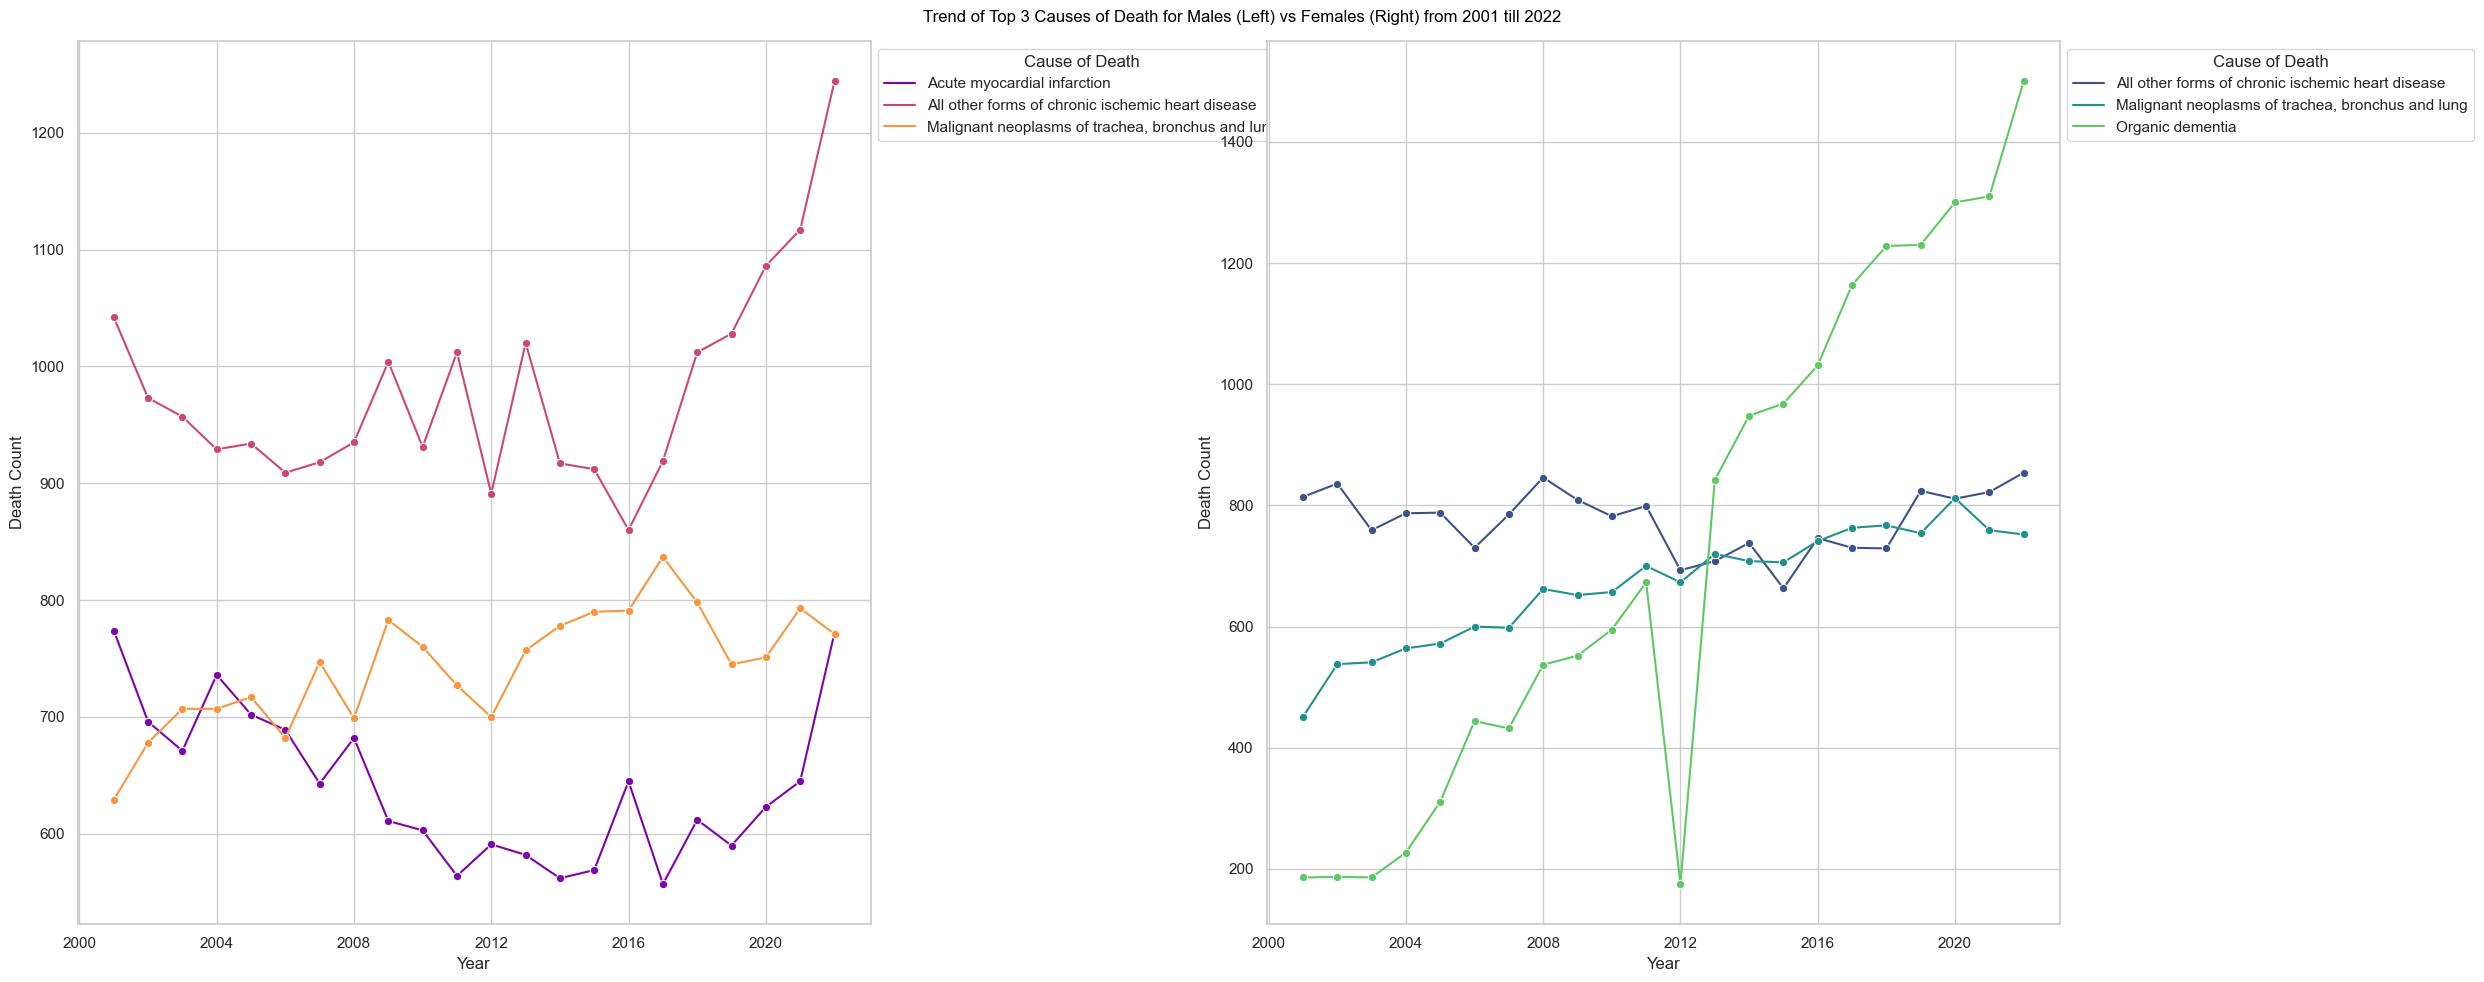

In [28]:
# plotting trend line plots for the top 3 causes of death for males and females over the years

df_male = male.groupby(['cause_death', 'year'])['count'].sum().reset_index()
df_female = female.groupby(['cause_death', 'year'])['count'].sum().reset_index()
top3_male = df_male.groupby('cause_death')['count'].sum().nlargest(3).index
top3_fem = df_female.groupby('cause_death')['count'].sum().nlargest(3).index


plt.figure(figsize=(25, 10))
plt.suptitle('Trend of Top 3 Causes of Death for Males (Left) vs Females (Right) from 2001 till 2022')
sns.set(style="whitegrid")
plt.subplot(1, 2, 1)
sns.lineplot(data=df_male[df_male['cause_death'].isin(top3_male)], x='year', y='count', hue='cause_death', palette='plasma',marker='o')
plt.xlabel('Year')
plt.ylabel('Death Count')
plt.legend(title='Cause of Death', loc='upper left', bbox_to_anchor=(1, 1))
plt.subplot(1, 2, 2)
sns.lineplot(data=df_female[df_female['cause_death'].isin(top3_fem)], x='year', y='count', hue='cause_death', palette='viridis',marker='o')
plt.xlabel('Year')
plt.ylabel('Death Count')
plt.legend(title='Cause of Death', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In an attempt to keep this report to a reasonable length, we won't examine all the causes of death for each gender. Instead, we will discuss the top three for each gender.

 **Top Male Causes:**



1. Chronic Ischemic Heart Diseases: Ischemia is a condition in which blood and oxygen flow are restricted. Some people may experience chest pain, while others may not exhibit any symptoms (silent ischemia). The trend for this illness has remained consistent, with an upward trend observed between 2016 and 2021. This increase can be attributed to population growth.
2. Malignant Neoplasms of Trachea, Bronchus, and Lung: This refers to the abnormal growth of cancerous tissue in the respiratory system. The trend for this disease is upward, but nothing unusual. As mentioned earlier, as the population increases, so does the death rate.
3. Acute Myocardial Infarction: In plain terms, this is a heart attack. It is similar to Ischemic Heart Diseases, but the difference lies in the fact that during a heart attack, blood flow is completely stopped, not just restricted. The trend for this cause is showing a downward trajectory, despite population growth. This could be a result of healthier diets, increased physical activity, and improved overall healthcare.

**Top Female Causes:**

1.	Chronic Ischemic Heart Diseases
2.	Organic Dementia: This term refers to the gradual decline in mental and cognitive abilities. The trend in this cause of death is a cause for concern as it has consistently ranked 1st among females since 2013. It demonstrates a clear upward trend since 2001, with an unexpected dip in 2012.
3.	Malignant Neoplasms of the Trachea, Bronchus, and Lung


For both chronic ischemic heart diseases and malignant neoplasms, there is a consistent and stable trend with a slight upward trajectory. This trend closely mirrors the trends observed among males, and the data does not reveal any unexpected patterns.






For both genders, all three trends exhibited a sharp increase during the global COVID-19 pandemic. This sudden surge was not included in our trend analysis as it is considered outlier data points, but it was displayed in the visualization.






#### Age Group Analysis

In [29]:
df_mgrp = df_m.groupby(by=['age_group', 'gender'])['count'].sum().reset_index()

fig = px.histogram(df_mgrp, x="age_group", y="count",
             color='gender', barmode='group', title='Deaths by Age Group from 2001 to 2022',
             height=400)
fig.show()

The above graph depicts the number of deaths across all age groups for all causes of deaths from 2001 to 2022. As evident, the maximum chunk of deaths are occuring in older age groups which is quite understandable.

One thing that is observed from this visual is that deaths for men is greater than women deaths in almost all age groups except for 80 and above. one interpretation of this can be that apparently women on average have a longer life span than men.

Once again, this could be due to external reasons and not necessarily due to any biological grounds. This is one interesting finding that can be studied more. Are women better at coping with stress? Do women in general make healthier life choices? Is there any biological reasons that lead to longer life spans for women?

In [30]:
age_bins = list(df_m['age_group'].unique())
age_bins

new_df_m = df_m.copy()

new_df_m['age_group'] = new_df_m['age_group'].astype(str)
age_labels = {
    '0-4': 'Infants',
    '5-9': 'Children',
    '10-14': 'Adolescents',
    '15-19': 'Adolescents',
    '20-24': 'Young Adults',
    '25-29': 'Young Adults',
    '30-34': 'Young Adults',
    '35-39': 'Adults',
     '40-44': 'Adults',
     '45-49': 'Adults',
     '50-54': 'Adults'
}
new_df_m['age_label'] = new_df_m['age_group'].map(age_labels).fillna('Older Adults')
new_df_m['year'] = new_df_m['year'].dt.year
top_causes = new_df_m.groupby(['year','cause_death','age_label'])['count'].agg('sum').reset_index()
idx = top_causes.groupby(['year','age_label'])['count'].idxmax()
result_df = top_causes.loc[idx]

top_causes
fig_bar = px.bar(result_df, x="cause_death", y="count", color="age_label",
                 animation_frame="year",
                 range_y=[0,1600],
                 text=['{}'.format(v) for v in result_df['count']],
                 color_discrete_sequence=px.colors.qualitative.T10)

fig_bar.update_yaxes(showgrid=False),
fig_bar.update_xaxes(categoryorder='total descending', mirror=True)
fig_bar.update_traces(hovertemplate=None,
                      textfont_color='white',
                      textposition = 'inside')
fig_bar.update_layout(title_text="Top Causes of Death in each age group", title_x = 0.5, showlegend=False)
fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=25,
                        xaxis_title='Causes of Death', yaxis_title="Sum of Death",
                        uniformtext=dict(minsize=11, mode='show'),
                        title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                        showlegend = True
                          )
fig_bar.show()





For the next few visuals the age groups are divided into 5 parts -

age 0 - 4 represents infants, 4-9 are childrens, 10-19 adolescents or teenagers, 20-34 young adults, 35-54 adults and 55+ are older adults.

The visual above delves into the top causes of death between distinct age groups which are categorized as mentioned earlier. The findings reveal some good insights into the mortality trends in each age group. The most notable peak in the visual was how the 'older adult' group consistently recorded the largest number of deaths in each year from 2001 to 2022. From a deeper dive into this particular age group reveals that Ischemic heart diseases was the leading cause of death in this category until the year 2013, after which Organic dementia became the reasons for this group's top cause of death which still continues in recent times. The number of death recorded for this age group is astonishing as the number of these age group is consistently above 1500 every year while the 2nd highest recorded didnt even cross 400 so the older adult group almost has 3 times more death than the 2nd highest age group in every year.

For Adults and Young adults the top cause of death until 2003 was suicide, after which it became death due to drugs and other biological substance abuse. This causes a concern in todays world as the people who are supposed to be leading our generating are dying the most due to sunbstance abuse which is often used as a quick escape from reality. This suggests a possible shift in coping mechanisms, with drugs becoming a more prevalent means of escaping reality, likely influenced by cultural and societal factors.

Infants, on the other hand, always faced an untimely death due to complications in pregnancy and other maternal factors. This raises the issue of having better healthcare interventions to reduce the mortality in this age group. Motor accidents and unknown causes of mortality are the primary contributors to their deaths, emphasizing the need for improved safety measures and vigilance in safeguarding the well-being of teenagers.


In [31]:
age_COD = new_df_m.groupby(['year','age_label'])['count'].sum().reset_index()
age_COD = age_COD.rename(columns={'count': 'Sum of deaths'})
total_pop = df_m.groupby('year')['count'].sum().reset_index()
total_pop['year'] = total_pop['year'].dt.year
merged_data = age_COD.merge(total_pop, on='year')
merged_data['Percentage'] = round((merged_data['Sum of deaths'] / merged_data['count']) * 100,2)
fig_bar = px.bar(merged_data, x="Sum of deaths", y="age_label", color="age_label",
                 animation_frame="year",
                 range_x=[0, 30000],
                 color_discrete_sequence=px.colors.qualitative.T10,
                 text=['{} %'.format(v) for v in merged_data['Percentage']],
                 orientation="h")

fig_bar.update_yaxes(showgrid=False),
fig_bar.update_xaxes(categoryorder='total descending')
fig_bar.update_traces(hovertemplate=None)
fig_bar.update_layout(title_text="Proportion of deaths of each age group from 2001 to 2022", title_x = 0.5, showlegend=False)
fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=25,
                        xaxis_title='Sum of deaths', yaxis_title="age_label",
                        #plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        uniformtext=dict(minsize=11, mode='show'),
                        title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                        )
fig_bar.show()


The visual shows that older adults consistently have a high death rate throughout the years, staying above 80%. This suggests that a significant proportion of total deaths each year are in the older age group. It indicates that a significant percentage of all fatalities, on average, occur in the older adult age group each year.
The visual also shows that as time passes, the death rate for older persons keeps rising. Around 15,000 senior citizens died in 2001, but by 2022, this figure would have more than doubled to nearly 30,000. The aging population may experience greater mortality rates over the next two decades as a result of this large rise. The population of alberta on 2001 was 3058108 so the proportion of older adults dying in that period is 0.5%. On one of our other visuals we saw that the rate of death on 2001 was 0.57% so “the majority of death is from older adults” checks out.
Adults have the second-highest death rate among all age categories, however it consistently stays below 12% throughout all years. This shows that while individuals above the age of 55 have a high mortality rate, persons under the age of 55 probably experience relatively fewer deaths overall. Other than older adults and adults, there are less than 5,000 fatalities annually in all age groups. This suggests that compared to older and adult age groups, these younger age groups had a reduced mortality rate.

Overall, the data point to a significant rise in the number of deaths among older persons over the past two decades. This might be caused by a number of things, like an aging population, modifications to healthcare access and quality, or adjustments to mortality trends. Adults among younger age groups continue to have a much lower and more constant death rate. Policymakers and healthcare professionals must be aware of these patterns in death rates in order to prepare for the demands of an aging population and seek to lower mortality rates, particularly in the older age group.


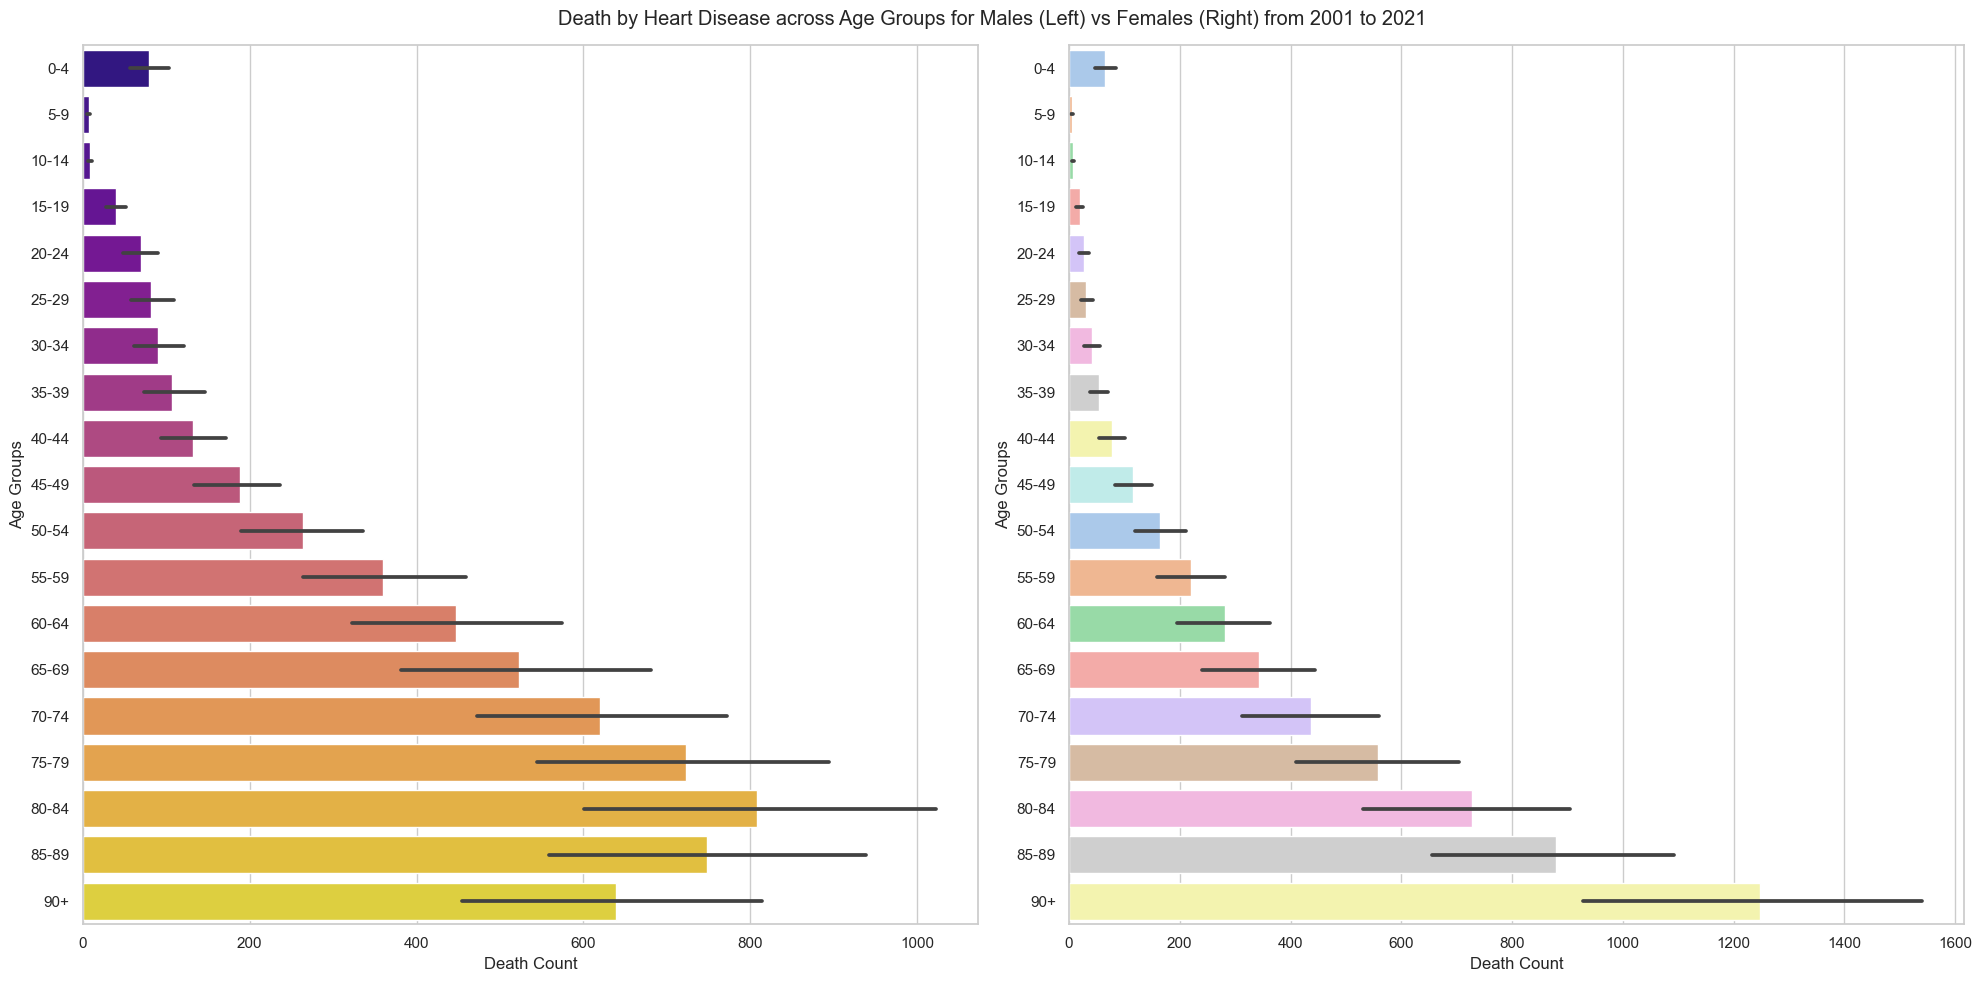

In [32]:
# group by Heart disease, year, and gender, age_group and sum the counts
dfgrp1 = df_m.groupby(by=[df_m['cause_death'] == 'All other forms of chronic ischemic heart disease', 'year', 'gender', 'age_group'])['count'].sum().reset_index()

# filter for Male
dfgrp1_male = dfgrp1[dfgrp1['gender'] == 'M']

# filter for Female
dfgrp1_fem = dfgrp1[dfgrp1['gender'] == 'F']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# bar plots for males and females
sns.barplot(data=dfgrp1_male, x='count', y='age_group', ax=ax1, palette= 'plasma', orient='h')
sns.barplot(data=dfgrp1_fem, x='count', y='age_group', ax=ax2, palette= 'pastel', orient='h')
ax1.set_xlabel('Death Count')
ax1.set_ylabel('Age Groups')
ax2.set_xlabel('Death Count')
ax2.set_ylabel('Age Groups')
fig.suptitle('Death by Heart Disease across Age Groups for Males (Left) vs Females (Right) from 2001 to 2021')
plt.tight_layout()
plt.show()

In our initial working, we made a chart identifying the top 10 causes of deaths in Alberta over the 20 years of data that we had. From that chart we learned that ischemic heart disease was the leading cause of death among Albertans.

So it only made sense to dig a little deeper and learn more about how this disease has affected different age groups and genders. For this purpose we created two bar charts, one for each gender, and visualised for each age group within those graphs. A bar graph seemed the most simple and elegant way to represent this.

From the visual trend for both genders, it can be inferred that ischemic heart disease is largely age related with a slight spike initially with infants (0-4 years old) probably witnessing some heart related complications, other than that there is a steady increasing trend showing that the older you get, higher is the probablity of developing an ischemic heart disease.

Moreover, one interesting thing that is observed is that more men tend to develop heart diseases at a younger age then women. The reason behind this does not necessarily have to be biological, rather it could be due to some external reasons. One article suggests that men's coping with stressful events may be less adaptive physiologically, behaviorally, and emotionally, contributing to their increased risk for heart related diseases. (Weidner, 2000)

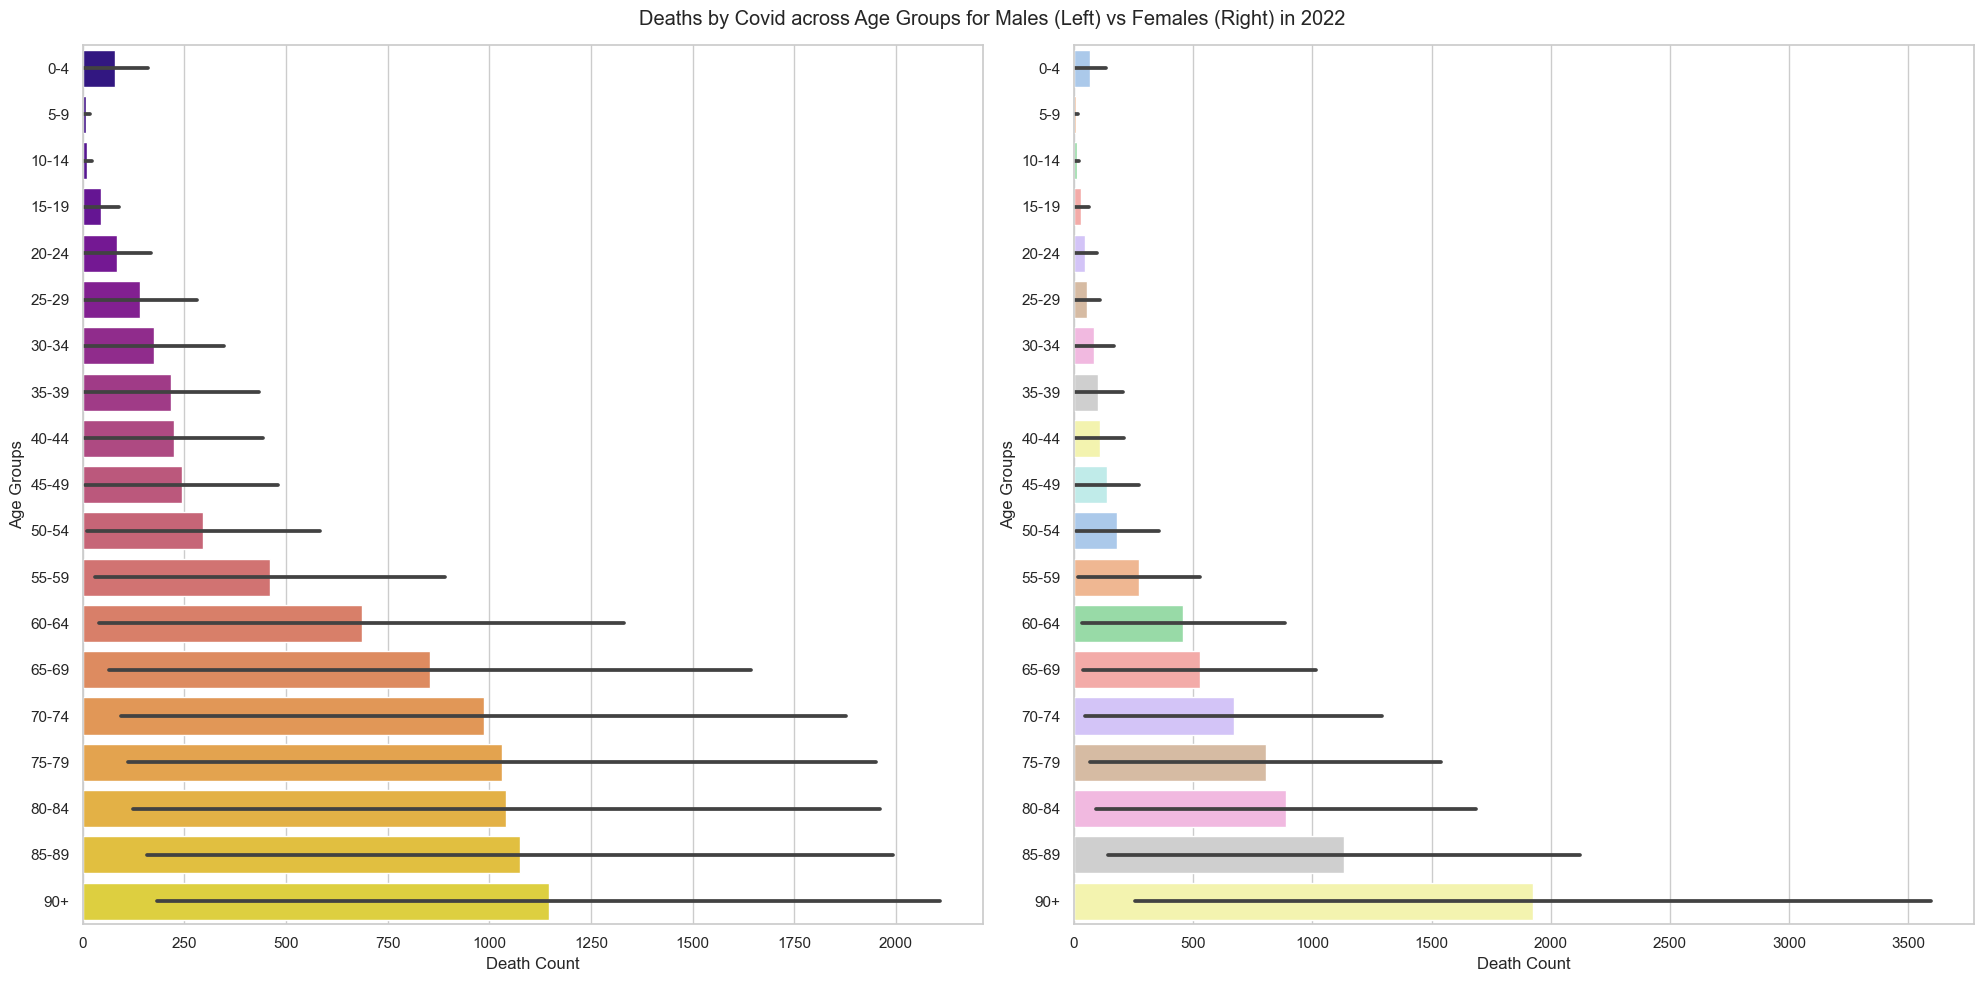

In [33]:
df_m2022 = df_m[df_m['year'].dt.year == 2022]

# group by Covid deaths, year, age group, and gender, and sum the counts
df2022grp = df_m2022.groupby(by=[df_m2022['cause_death'] == 'COVID-19, virus identified', 'year', 'gender', 'age_group'])['count'].sum().reset_index()

# filter for Male in 2021
df2022grp_male = df2022grp[df2022grp['gender'] == 'M']

# filter for Female in 2021
df2022grp_fem = df2022grp[df2022grp['gender'] == 'F']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# bar plots for males and females
sns.barplot(data=df2022grp_male, x='count', y='age_group', ax=ax1, palette= 'plasma', orient='h')
sns.barplot(data=df2022grp_fem, x='count', y='age_group', ax=ax2, palette= 'pastel', orient='h')
ax1.set_xlabel('Death Count')
ax1.set_ylabel('Age Groups')
ax2.set_xlabel('Death Count')
ax2.set_ylabel('Age Groups')
fig.suptitle('Deaths by Covid across Age Groups for Males (Left) vs Females (Right) in 2022')
plt.tight_layout()
plt.show()

The COVID-19 pandemic was a very unfortunate event. It created a lot of panic and forced us in to a lockdown. But even worse, it made us say good bye to many of our friends and family. hunderds and thousands of people were lost due to this disease and supposedly it also triggered other health complications in people as well. It has been widely reported how a lot people who had gotten covid, later suffered heart complications.

In the visual seen above, we can see the total number of deaths that had occurred due to covid for both the genders across various all age groups. As we can see that for the older age groups the number of deaths are higher. Probably, people belonging to the older age groups are more vulnerable to the disease and have lower immunity levels.

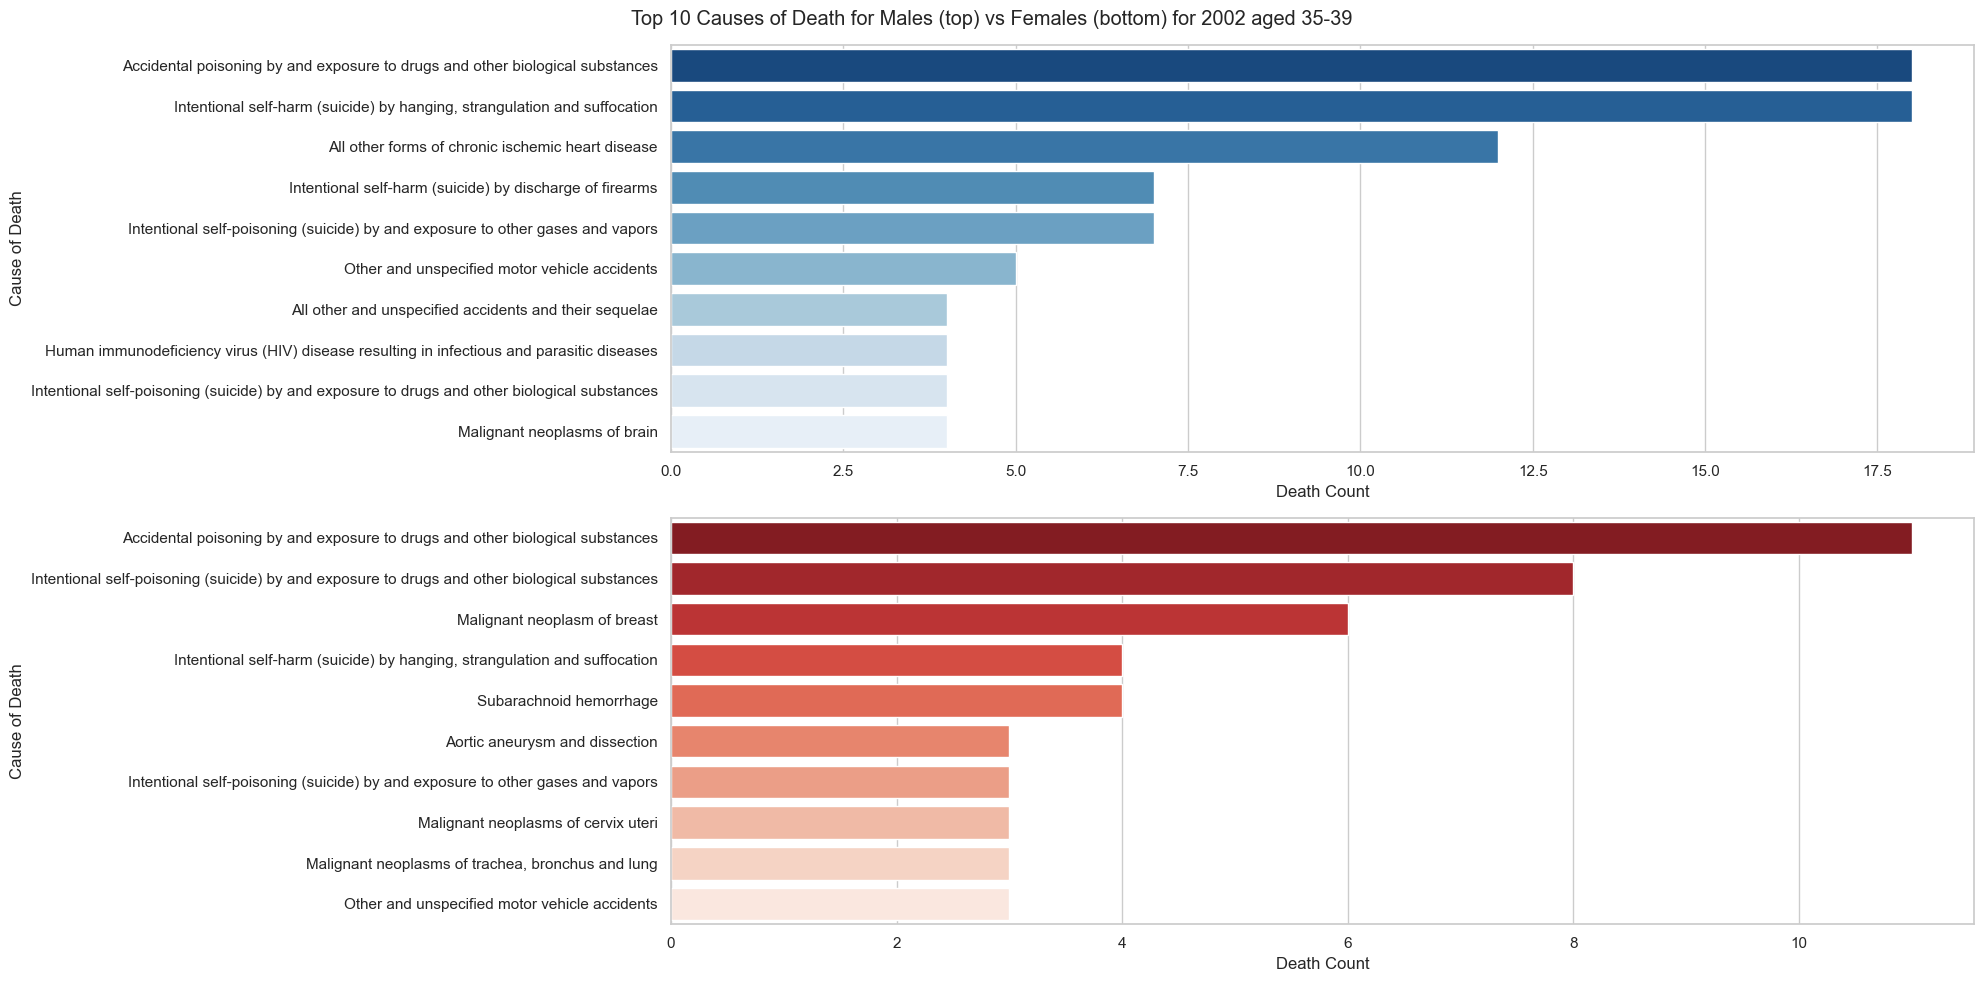

In [34]:
# create function to graph 10 top casues for inputed year/age group.

def age_year_graph(year,age):

# filter data by gender, year, cause of death and age group, then fliter them to male and female
    df_agg = df_m.groupby(['gender', 'year', 'cause_death','age_group'])['count'].sum().reset_index()
    df_agg=df_agg[df_agg['count']!=0]
    df_agg_male_age=df_agg[(df_agg['gender']=="M")]
    df_agg_female_age=df_agg[(df_agg['gender']=="F")]

#create list of age groups to use in dictionary indices creation
    age_group_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+']
#create two different dictionaries for each gender.
    df_age_m={name: pd.DataFrame() for name in age_group_order}
    df_age_f={name: pd.DataFrame() for name in age_group_order}



#create a dictionary to store values for each age group for all the years(not seperated by year!)
#male
    for key1, value in df_age_m.items():
        df_age_m[key1]=df_agg_male_age[df_agg_male_age['age_group']==key1]
#female
    for key1, value in df_age_f.items():
        df_age_f[key1]=df_agg_female_age[df_agg_female_age['age_group']==key1]

#filter top 10 results using the request year, and age, for each gender
    topmale_age_group=df_age_m[age][df_age_m[age]["year"]==year].nlargest(10, "count")
    topfemale_age_group=df_age_f[age][df_age_f[age]["year"]==year].nlargest(10, "count")

#graph results


    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
    fig.suptitle(f'Top 10 Causes of Death for Males (top) vs Females (bottom) for {year} aged {age}')
    sns.barplot(data=topmale_age_group, x='count', y='cause_death', ax=ax1, palette='Blues_r', orient='h')
    sns.barplot(data=topfemale_age_group, x='count', y='cause_death', ax=ax2, palette='Reds_r', orient='h')
    ax1.set_xlabel('Death Count')
    ax1.set_ylabel('Cause of Death')
    ax2.set_xlabel('Death Count')
    ax2.set_ylabel('Cause of Death')
    plt.tight_layout()
    plt.show()



#pick any of those age groups, '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+'
#pick any year between 2001 and 2022.

age_year_graph("2002","35-39")

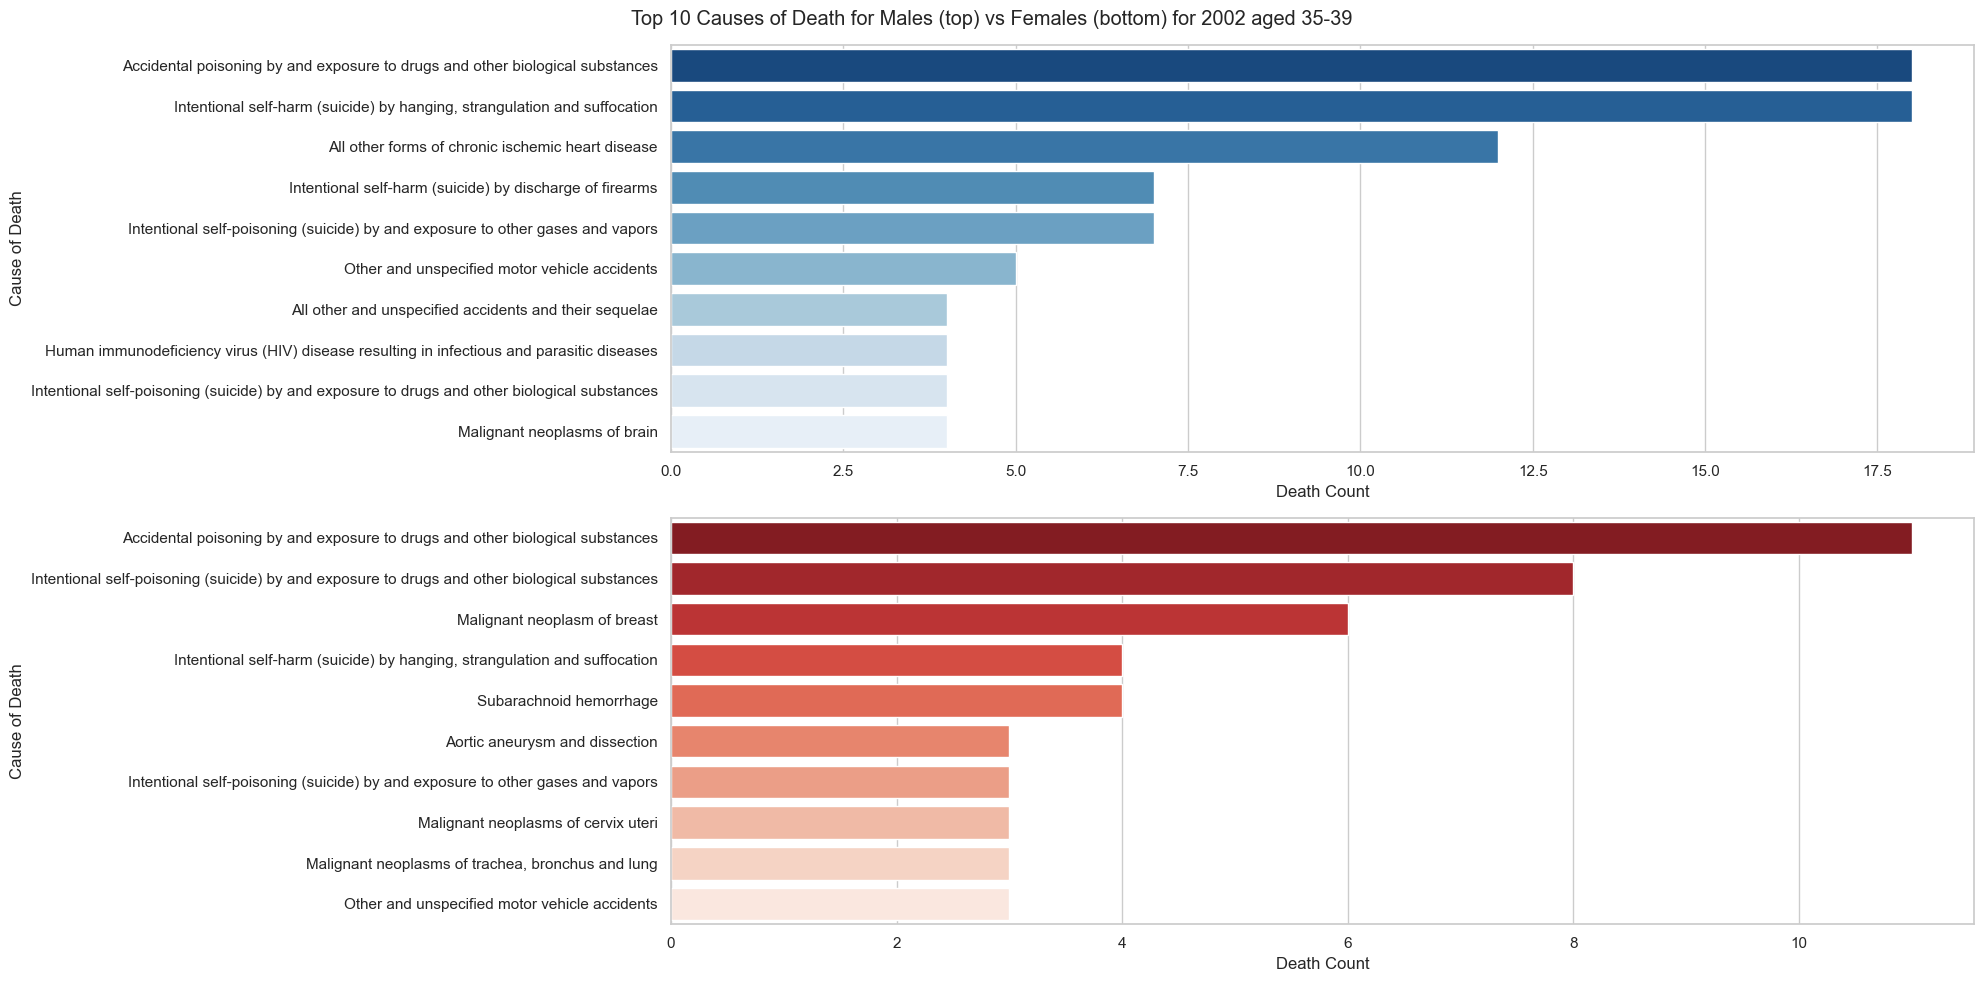

In [35]:
#pick any of those age groups, '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+'
#pick any year between 2001 and 2022.

age_year_graph("2002","35-39")

The above function effectively generates graphical representations of the leading causes of death based on a user's selected year and age group. To validate its functionality, I conducted a test run by choosing a random year and my own age group.

The analysis of the results reveals that the top two causes of death are accidental poisoning by and exposure to drugs and other biological substances, closely followed by suicide. Notably, these top two causes are consistent for both males and females. However, the third leading cause of death diverges by gender, with heart disease ranking as the third most common cause for males and breast cancer for females. This insightful comparison underscores the importance of tailoring healthcare strategies to address gender-specific health concerns.

#### A Deep-Dive into Cancer Trends

Total cancer deaths spanning 2001-2022: 133299


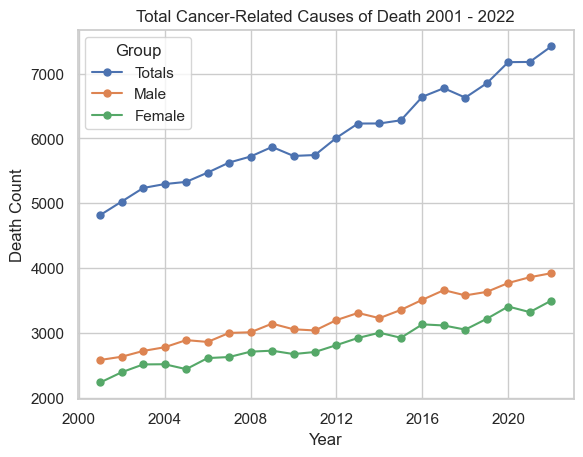

In [36]:
#Cancer total gender summary

cdf_m, canc, noncanc = create_cancerdf(df_m)
#cdf, canc, noncanc = create_cancerdf(cdata)

#-----------------------
cyear_counts = cdf_m.groupby('year')['count'].sum()
tot_cancer = cyear_counts.sum()
print(f"Total cancer deaths spanning 2001-2022: {tot_cancer}")

years = cyear_counts.reset_index()['year']
totcounts = cyear_counts.reset_index()['count']

#Getting total gender counts of all years
cgender = cdf_m.groupby(['year','gender'])['count'].sum().reset_index()
mctot = cgender[cgender['gender'] == 'M']['count']
fctot = cgender[cgender['gender'] == 'F']['count']

plt.title('Total Cancer-Related Causes of Death 2001 - 2022')
plt.plot(years,totcounts,marker='o',markersize=5, label = "Totals")
plt.plot(years,mctot,marker='o',markersize=5, label = "Male")
plt.plot(years,fctot,marker='o',markersize=5, label = "Female")
plt.xlabel('Year')
plt.ylabel('Death Count')
plt.legend(title='Group', loc='upper left')
plt.show()

From this basic summary graph, we can clearly see that the total male deaths due to cancer is greater than females for every year. There is a clear upward trend for both sexes over time, though we cannot yet say if there is a true proportional increase in cancer mortality rate as we have not accounted for an increasing population over time.

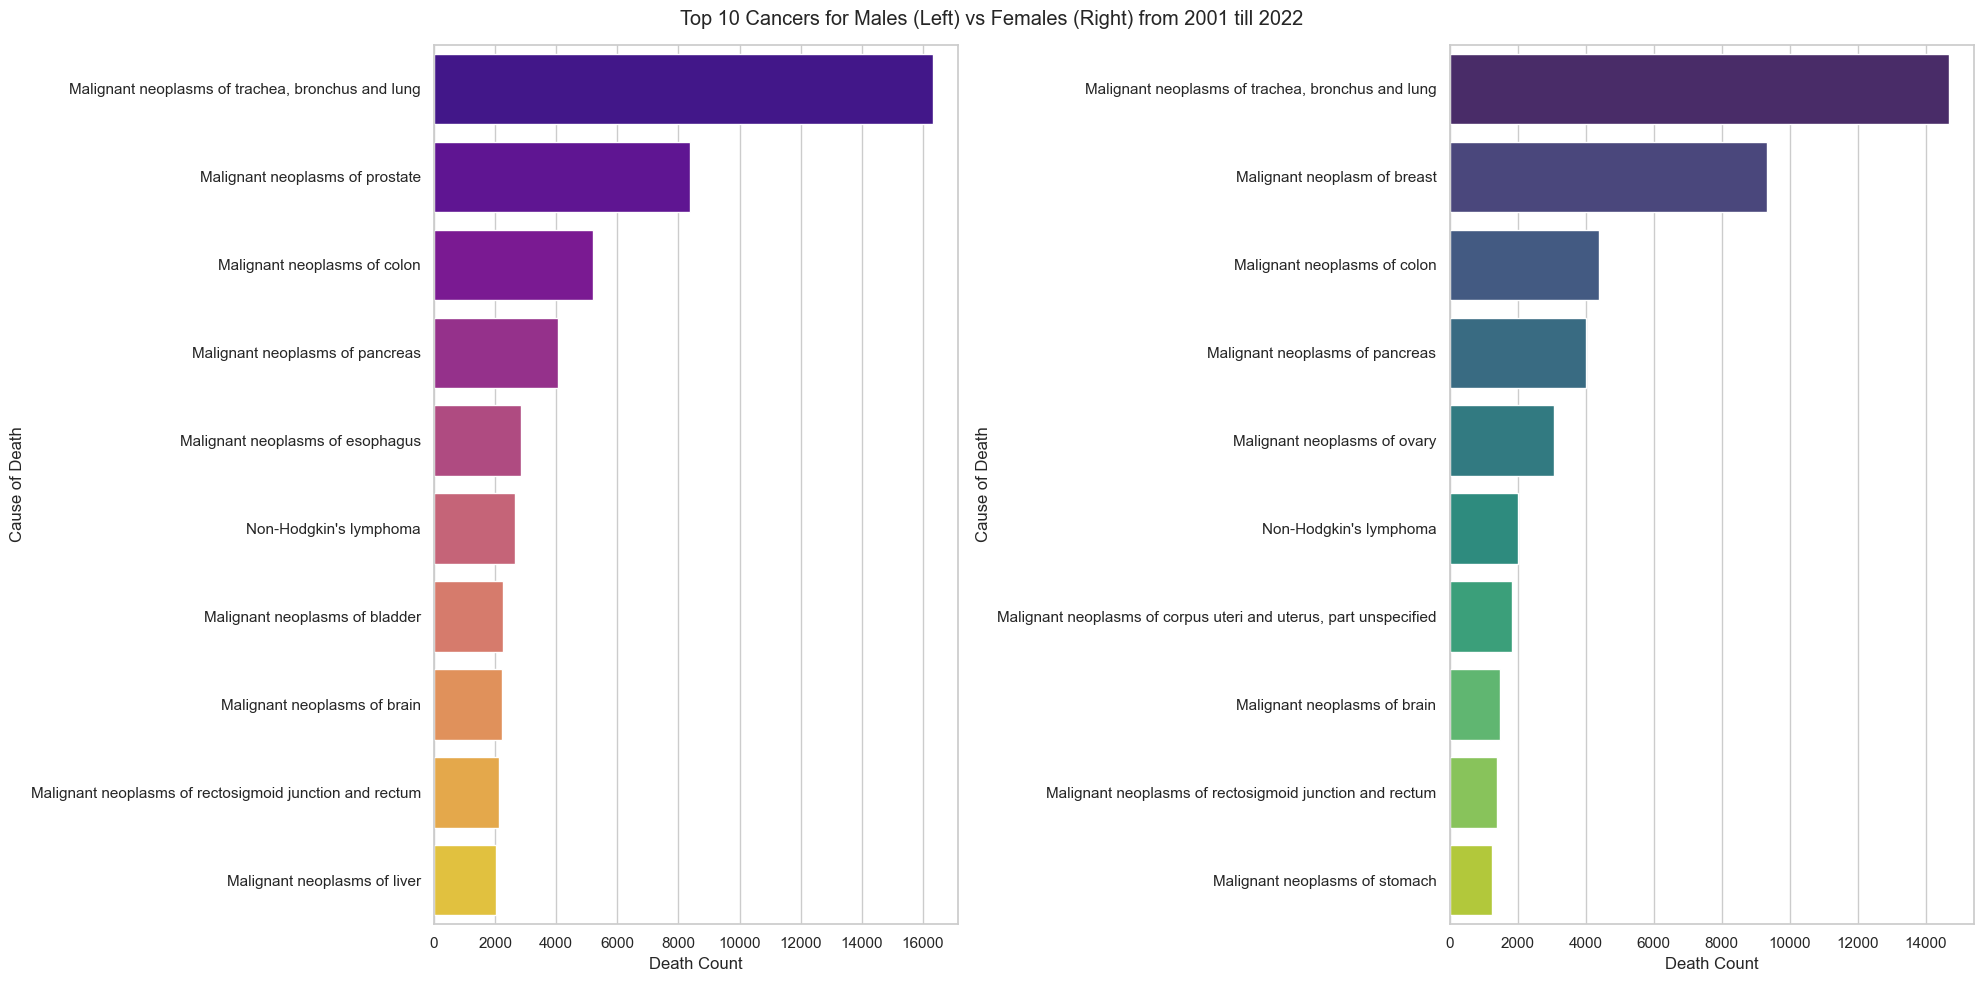

In [37]:
#Showing top cancer causes and associated death counts

#Deciding to get rid of unknown/other cancers for rest of visualizations
cdf_m = cdf_m[cdf_m['cause_death'] != 'Other malignant neoplasms of other and unspecified sites']
cdf_m = cdf_m[cdf_m['cause_death'] != 'Neoplasms of uncertain or unknown behavior of specified sites']

cmale = cdf_m[cdf_m['gender'] == 'M']
cfemale = cdf_m[cdf_m['gender'] == 'F']
cdf_male = cmale.groupby('cause_death')['count'].sum().reset_index()
cdf_female = cfemale.groupby('cause_death')['count'].sum().reset_index()
top10c_male = cdf_male.nlargest(10, 'count')
top10c_fem = cdf_female.nlargest(10, 'count')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Top 10 Cancers for Males (Left) vs Females (Right) from 2001 till 2022')
sns.barplot(data=top10c_male, x='count', y='cause_death', ax=ax1, palette='plasma', orient='h')
sns.barplot(data=top10c_fem, x='count', y='cause_death', ax=ax2, palette='viridis', orient='h')
ax1.set_xlabel('Death Count')
ax1.set_ylabel('Cause of Death')
ax2.set_xlabel('Death Count')
ax2.set_ylabel('Cause of Death')
plt.tight_layout()
plt.show()

This visualization makes it clear that lung-related cancers are disproportionately the most significant cause of cancer in comparison to all others. The largest difference between gender cancer causes appears to be sex-specific cancers such as breast, cervix, and prostate cancers with the rest of the cancers having somewhat similar mortality proportions. Males also appear to be more affected by bladder and esophageal cancers than females.

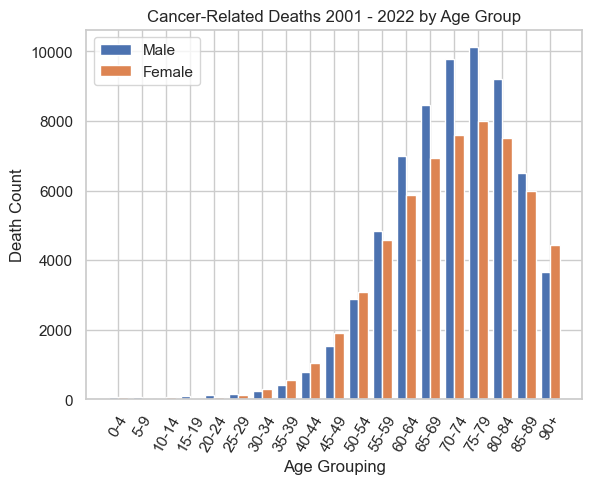

In [38]:
#Total demographic breakdown
agem = cmale.groupby('age_group')['count'].sum().reset_index()
agef = cfemale.groupby('age_group')['count'].sum().reset_index()

n = np.arange(len(agem['count']))
plt.bar(n  - 0.2, agem['count'],width=0.4, label="Male")
plt.bar(n + 0.2, agef['count'],width=0.4, label="Female")
plt.xticks(ticks=n,labels=agem['age_group'], rotation=60)
plt.xlabel('Age Grouping')
plt.ylabel('Death Count')
plt.title('Cancer-Related Deaths 2001 - 2022 by Age Group')
plt.legend(loc='upper left')
plt.show()

The gender difference can be seen as largest in age groups spanning 60-89 years among men. However, some age groups closer to being middle-aged around 34-54 actually shows a higher overall female death counts. ​


The 75-79 age group appears to be at highest risk of cancer mortality among both males and females.


There is a clear trend in cancer death count and age, except for the years 75 onwards, perhaps because a proportion of the population had already passed away before those ages.


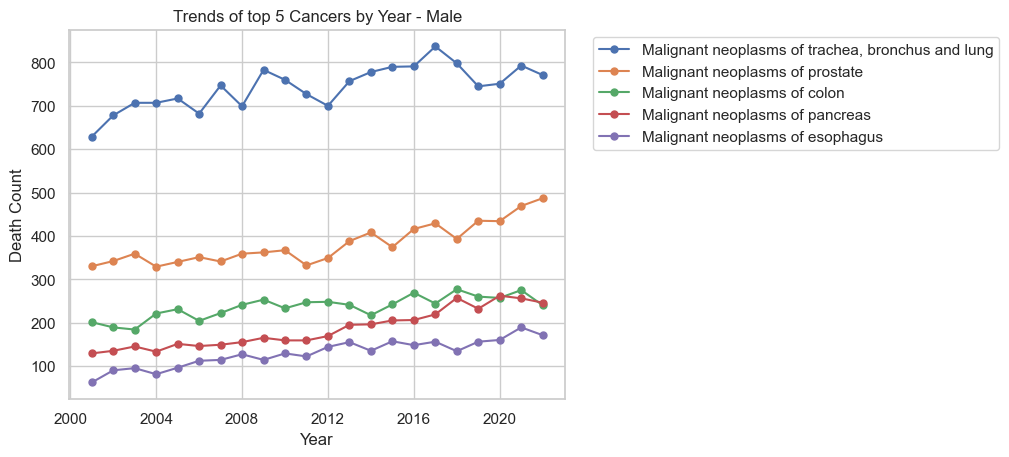

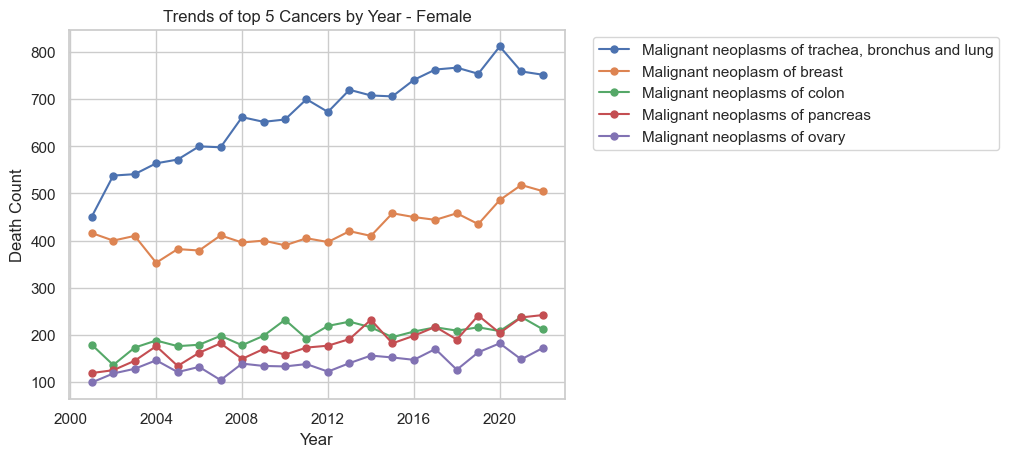

In [39]:
#Plotting year trends in top N cancers

#N is however many of the top cancers you want to look at
N = 5
topNc_male = cdf_male.nlargest(N, 'count')
topNc_fem = cdf_female.nlargest(N, 'count')

cdf_maleyear = cmale.groupby(['year','cause_death'])['count'].sum().reset_index()
cdf_femaleyear = cfemale.groupby(['year','cause_death'])['count'].sum().reset_index()
causem = topNc_male['cause_death']
causef = topNc_fem['cause_death']
cdf_maletop = cdf_maleyear[cdf_maleyear['cause_death' ].isin(causem)]
cdf_femaletop = cdf_femaleyear[cdf_femaleyear['cause_death' ].isin(causef)]

plt.title(f'Trends of top {N} Cancers by Year - Male')
plt.xlabel('Year')
plt.ylabel('Death Count')
for cause in causem:
    #plotting male causes of death
    yeardf_m = cdf_maletop[cdf_maletop['cause_death'] == cause]
    disease_count = yeardf_m['count']
    plt.plot(years,disease_count,marker='o',markersize=5, label = f"{cause}")
plt.legend(loc='best',bbox_to_anchor=(1.04, 1))
plt.show()

plt.title(f'Trends of top {N} Cancers by Year - Female')
plt.xlabel('Year')
plt.ylabel('Death Count')
for cause in causef:
    #plotting male causes of death
    yeardf_f = cdf_femaletop[cdf_femaletop['cause_death'] == cause]
    disease_count = yeardf_f['count']
    plt.plot(years,disease_count,marker='o',markersize=5, label = f"{cause}")
plt.legend(loc='best',bbox_to_anchor=(1.04, 1))
plt.show()


Here we have plotted the top 5 cancers affecting each gender to show their trends over time. The overall trend with each year isn't as statistically interesting because we have not accounted for population increase, but the relative trends between cancers is still of interest. In particular, although they weren't too different before, there appears to be a slight overall increase in pancreatic cancer mortality compared to colon cancer for both males and females over time, becoming roughly equal for many of the recent years. Furthermore, for the female graph lung cancers and breast cancer have a similar mortality count in 2001. Over time however, lung cancer has kept a steady trend leading to far higher mortality than breast cancer. Perhaps this could suggest we have become better over time at diagnosing or treating breast cancer.

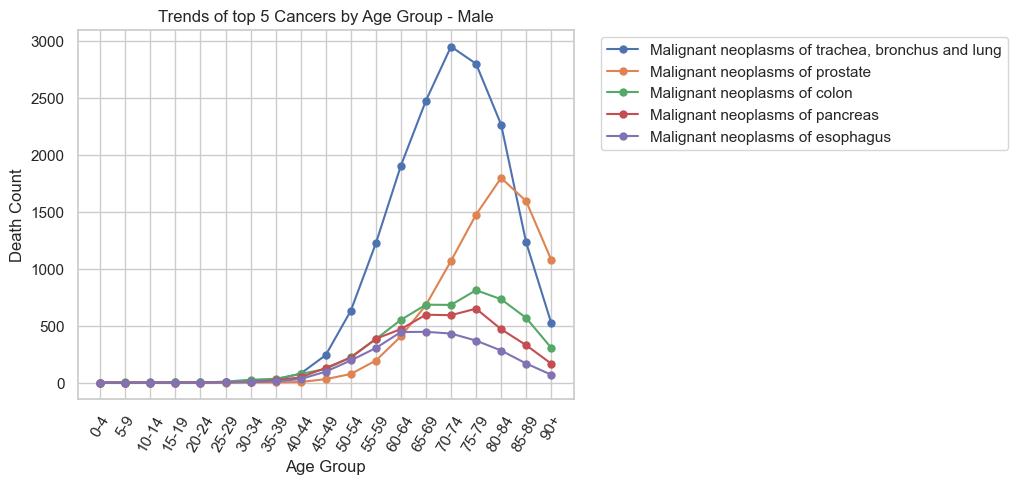

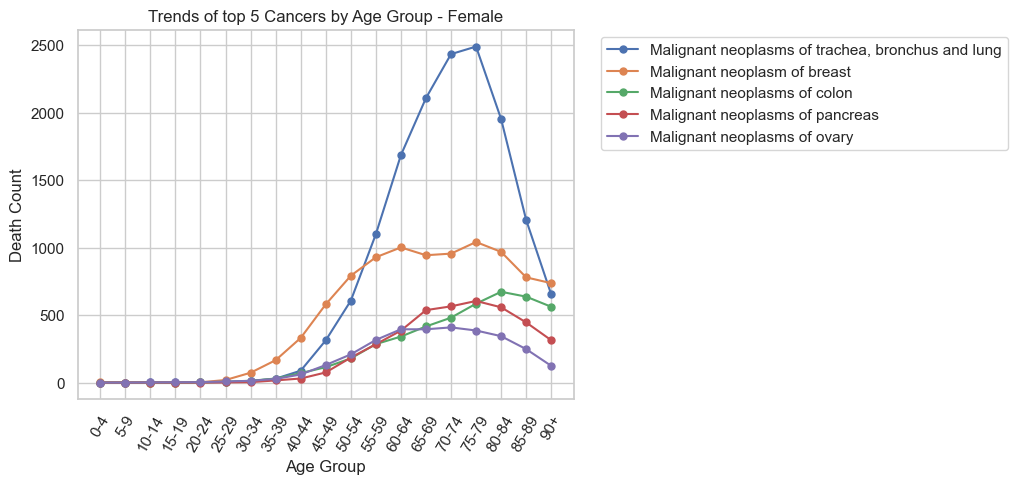

In [40]:
#Plotting top N cancers with age group trends

N = 5
topNc_male = cdf_male.nlargest(N, 'count')
topNc_fem = cdf_female.nlargest(N, 'count')

cdf_maleage = cmale.groupby(['age_group','cause_death'])['count'].sum().reset_index()
cdf_femaleage = cfemale.groupby(['age_group','cause_death'])['count'].sum().reset_index()
causem = topNc_male['cause_death']
causef = topNc_fem['cause_death']
cdf_maletop = cdf_maleage[cdf_maleage['cause_death' ].isin(causem)]
cdf_femaletop = cdf_femaleage[cdf_femaleage['cause_death' ].isin(causef)]

plt.title(f'Trends of top {N} Cancers by Age Group - Male')
plt.xlabel('Age Group')
plt.ylabel('Death Count')
for cause in causem:
    #plotting male causes of death
    agedf_m = cdf_maletop[cdf_maletop['cause_death'] == cause]
    disease_count = agedf_m['count']
    plt.plot(age_group_order,disease_count,marker='o',markersize=5, label = f"{cause}")
plt.xticks(rotation=60)
plt.legend(loc='best',bbox_to_anchor=(1.04, 1))
plt.show()

plt.title(f'Trends of top {N} Cancers by Age Group - Female')
plt.xlabel('Age Group')
plt.ylabel('Death Count')
for cause in causef:
    #plotting male causes of death
    agedf_f = cdf_femaletop[cdf_femaletop['cause_death'] == cause]
    disease_count = agedf_f['count']
    plt.plot(age_group_order,disease_count,marker='o',markersize=5, label = f"{cause}")
plt.xticks(rotation=60)
plt.legend(loc='best',bbox_to_anchor=(1.04, 1))
plt.show()

Agreeing with our previous findings, seniors are disproportionately affected by the top main cancers compared to youths. It can be seen in the male graph that lung cancers tend to peak for ages around 70-79, with the second leading cause, prostate cancer, also showing a clear peak but instead for the age group around 80-84. A similar peak in age group for lung cancers can be seen for females around 70-79. Breast cancer however, appears to have a somewhat flat distribution at its peak spanning 55-84 years. Esophageal cancer for men and ovarian cancer for women appears to peak slightly young, around the 60-64 age group.

C:\Users\USER\AppData\Local\Temp\ipykernel_27128\668184943.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



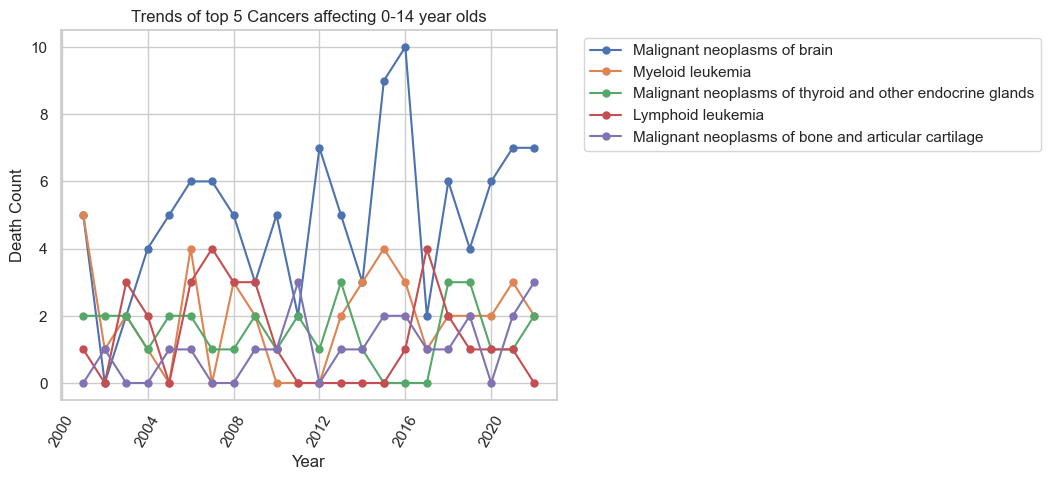

In [41]:
#Plotting top cancer trends affecting 0-14 youths
youths = age_group_order[:3]
youngc = cdf_m[cdf_m["age_group"].isin(youths)]
youngc["age_group"] = youngc["age_group"].astype(str)

#Get top cancers affecting youths
N = 5
cdf_young = youngc.groupby('cause_death')['count'].sum().reset_index()
topNc_young = cdf_young.nlargest(N, 'count')

cdf_youngage = youngc.groupby(['year','cause_death'])['count'].sum().reset_index()
causeyoung = topNc_young['cause_death']
cdf_youngtop = cdf_youngage[cdf_youngage['cause_death' ].isin(causeyoung)]

plt.title(f'Trends of top {N} Cancers affecting 0-14 year olds')
plt.xlabel('Year')
plt.ylabel('Death Count')
for cause in causeyoung:
    #plotting male causes of death
    yeardf_young = cdf_youngtop[cdf_youngtop['cause_death'] == cause]
    disease_count = yeardf_young['count']
    plt.plot(years,disease_count,marker='o',markersize=5, label = f"{cause}")
plt.xticks(rotation=60)
plt.legend(loc='best',bbox_to_anchor=(1.04, 1))
plt.show()

Here we have once again plotted the trends of top 5 cancers, this time only looking at youths 0-14 years of age. While there are many zero values for some of the cancer causes and it is difficult to draw conclusions from the small proportion of cancer mortalities in the graph, brain cancer and the combination of two different leukemia types shown here appear to have the highest mortality for youths.

Further cancer analysis that could be performed in a subsequent report would be to first adjust mortality totals by a dataset containing the Alberta population value of every year, such that we can see the proportial mortality rate (e.g. mortality per 100,000 people). We could then use our mortality rate to compare it to other known cancer mortality rates such as the national or global averages.

An additional analysis would be to take the aforementioned mortality rate findings and compare them to a diagnosis rate dataset, such that we can determine lethality rates where we show the ratio of diagnosis to mortality.

### 5. Conclusion

In 2001, Alberta's population stood at 2,974,807, and it has since grown to 4,510,891 in 2022 (Population statistics | Alberta.ca, n.d.). With this substantial population increase, it's only natural to anticipate a corresponding rise in the death rate. Indeed, the data supports this assumption, revealing a modest increase in mortality over the timeline.

The top mortality trends call for several critical actions:

- Increase Cancer Funding: To address the growing burden of cancer-related deaths, it is imperative to allocate additional resources for researching new treatment methods and enhancing early screening tests. This investment can lead to improved patient outcomes and early detection.

- Prevent Heart Disease: Implementing a comprehensive action plan to prevent heart disease is essential. This plan should encompass aspects such as monitoring sodium intake, promoting regular exercise, and increasing public awareness about heart health.

- Addressing Dementia: There is a concerning upward trajectory in dementia cases. Alberta's health authorities and policymakers must prioritize investigations into this issue, working to understand the causes and develop strategies for prevention and care.

- Mental Health Focus: Mental health is a pressing concern across all age groups, with a particularly alarming prevalence of suicide among younger individuals. Allocating resources and implementing programs that address mental health is paramount to reduce these devastating statistics.

- Combat Poisoning Incidents: Poisoning, whether due to overdose or intentional actions, is impacting the population at large. A comprehensive approach involving law enforcement, healthcare services, and social initiatives is necessary to address this issue effectively and prevent further harm.

In light of the changing demographic landscape and the evolving causes of death, these actions are crucial to promote the health and well-being of Alberta's residents and ensure a brighter, healthier future for the province.






### 6. References



*   Silent ischemia and ischemic heart disease. (n.d.). Www.Heart.Org. Retrieved 8 October 2023, from https://www.heart.org/en/health-topics/heart-attack/about-heart-attacks/silent-ischemia-and-ischemic-heart-disease


*   Population statistics | Alberta.ca. (n.d.). Retrieved 8 October 2023, from https://www.alberta.ca/population-statistics


*   Malignant neoplasm: What it is, types & factors. (n.d.). Cleveland Clinic. Retrieved 8 October 2023, from https://my.clevelandclinic.org/health/diseases/22319-malignant-neoplasm

*   2001 community profiles. (n.d.). Retrieved 8 October 2023, from https://www12.statcan.gc.ca/English/profil01/CP01/Details/Page.cfm?Lang=E&Geo1=CMA&Code1=835__&Geo2=PR&Code2=48&Data=Count&SearchText=Edmonton&SearchType=Begins&SearchPR=01&B1=Population&Custom=



*   Deaths, cause by gender and age - Deaths, cause by gender and age - Open Government. (2020, June 30). Alberta Government. Retrieved September 17, 2023, from https://open.alberta.ca/dataset/deaths-cause-by-gender-and-age/resource/0e420902-e5e7-4fc4-af2a-5fd826c17d33


*   Yetman, D. (2022, April 4). Comorbidity: causes and health implications. Healthline. https://www.healthline.com/health/comorbidity



*   Student resources. (2023, February 16). University of Calgary. https://www.ucalgary.ca/brand/student-resources

*   Mortality rates, by age group - Dataset - Open Government Portal. (n.d.). https://open.canada.ca/data/dataset/92e1a97c-f067-47a4-9d72-965effafecd6/resource/5dfb979e-0871-448f-bba8-1a29c3a782cc


*   Weidner G. Why do men get more heart disease than women? An international perspective. J Am Coll Health. 2000 May;48(6):291-4.
https://pubmed.ncbi.nlm.nih.gov/10863872/#:~:text=Overall%2C%20it%20appears%20that%20men's,their%20increased%20risk%20for%20CHD.

